# <center><u><font color='red'>Projet 7 : Implémentez un modèle de scoring</font></u><br> <br><font color='red'>Partie 2 : Modélisation </font></center> 

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 40
core id		: 0
cpu cores	: 20
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor

# <font color='green'>Réflexion + fonctions</font>

Dans ce notebook, je vais tout d'abord mettre en place un modèle de régression comme base puis une comparaison d'algorithmes de classification, déterminer celui qui sera le plus adapté à notre problématique (en prenant en compte le fait qu'il y ait un déséquilibre de TARGET) tout en montrant l'importance des features puis séléctionner les features pertinentes pour les visualisations sur notre dashboard.

L'objectif de ce projet est d'utiliser les données historiques des demandes de prêt pour prédire si un demandeur sera en mesure ou non de rembourser un prêt. "Il s'agit d'une classification supervisée".

apprentissage superviser : Les étiquettes sont incluses dans les données d'apprentissage et l'objectif est de former un modèle pour apprendre à prédire les étiquettes à partir des caractéristiques.
Classification : L'étiquette est une variable binaire, 0 (remboursera le prêt à temps), 1 (aura des difficultés à rembourser le prêt)".




Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. 

Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.


## <font color='blue'>Reflexion</font>

**Métrique adaptée au problème de la banque:**

La banque cherche les personnes ne pouvant rembourser un prêt et lorsque ce but est atteint l'évènement est positif. Le défaut de remboursement sera donc considéré comme l'évènement positif. posifit = 1.

>TP (True Positives) : les cas où la prédiction est positive, et où la valeur réelle est effectivement positive.  <font color='red'>LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET</font>

>TN (True Negatives) : les cas où la prédiction est négative, et où la valeur réelle est effectivement négative. <font color='red'>LE PRET EST ACCORDE ET LE CLIENT PEUT REMBOURSER LE PRET</font> 

>FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative.  <font color='red'>LE PRET N'EST PAS ACCORDE MAIS LE CLIENT PEUT REMBOURSE LE PRET</font>

>FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive. <font color='red'>LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET</font> 

Une banque cherche à ne pas accorder de prêt à des clients qui ne peuvent pas le rembourser (TP à maximiser). La banque ne veut pas accorder un prêt à un client qui ne peut pas le rembourser (FN à minimiser). La banque fait un déficit si elle n'accorde pas de prêt à des clients qui peuvent rembourser le prêt.


**Les algorithmes sont comparés par les métriques suivantes :** 
* Accuracy_score : le ratio entre le nombre total de prédictions correctes et le nombre total de prédictions (c'est la justesse de la prédiction).
* Precision : Le ratio entre les vrais positifs et tous les positifs
* Recall : La moyenne harmonique de Precision et du Recall. Un bon score F1 indique une bonne Precision et une bonne valeur de Recall
* F1_score : Synthèse de Precision et Recall
* AUC : Aire sous la courbe ROC = mesure de la capacité d'un classifieur à distinguer les classes. Plus l'AUC est élevée, plus la performance du modèle à distinguer les classes positives et négatives est bonne.
* Matrice de confusion
* ROC Curve



maximiser : AUC, TP, F1, recall


minimiser : FN


**Définition d'une métrique "métier"**

Il faut créer une métrique pertinente concernant notre problématique pour comparer nos algorithmes. Une société de crédit cherche à "maximiser" ses gains. 
* Accorder un crédit à quelqu'un ne pouvant pas le rembourser par la suite (FN) est synonyme de perte pour l'entreprise
* Accorder un crédit à un client qui le rembousera par la suite (TN) est un gain.
* Ne pas accorder le prêt et que le client ne peut pas rembourser (TP) n'est ni une perte, ni un gain. 
* Ne pas accorder le prêt mais que le client pouvait rembourser (FP) est une perte de client donc d'argent.

On va donc créer un score en pondérant les différents cas possibles qui sera normalisé entre 0 et 1 par une normalisation min-max feature scalling avec : 

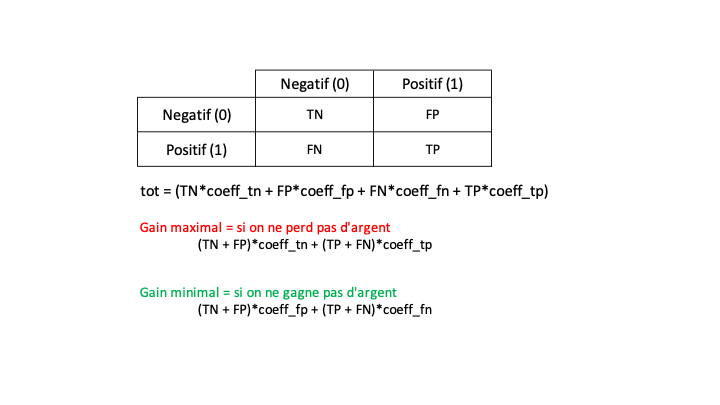

puis gain = (tot-gain_min) / (gain_max-gain_min)


Exemple de coefficients possibles en respectant la métrique métier :
* FN ==> perte d'argent pour la banque ==> -100 
* TP ==> refus de prêt ==> 0
* TN ==> prêt accordé, gain d'argent pour la banque ==> +10
* FP ==> client perdu, perte d'argent pour la banque ==> -1

La courbe ROC (Reciever Operating Characteristic) représente le taux de vrais positifs par rapport au taux de faux positifs.

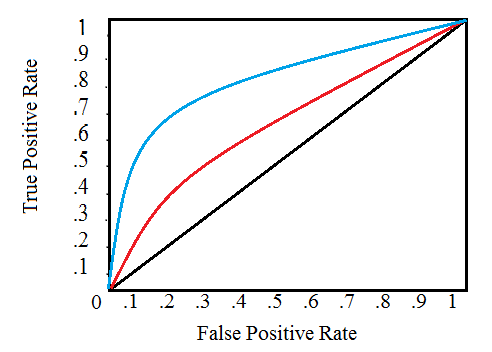

Une seule ligne sur le graphique indique la courbe pour un seul modèle, et le déplacement le long d'une ligne indique le changement du seuil utilisé pour classer une instance positive. Le seuil commence à 0 dans la partie supérieure droite et va jusqu'à 1 dans la partie inférieure gauche. Une courbe qui se trouve à gauche et au-dessus d'une autre courbe indique un meilleur modèle. Par exemple, le modèle bleu est meilleur que le modèle rouge, qui est meilleur que la ligne diagonale noire qui indique un modèle de supposition aléatoire naïve.

AUC :  Il s'agit simplement de l'aire sous la courbe ROC. (C'est l'intégrale de la courbe.) Cette métrique est comprise entre 0 et 1, un meilleur modèle obtenant un score plus élevé. Un modèle qui se contente de deviner au hasard aura une AUC ROC de 0,5. l'AUC est une mesure de la probabilité pour que le modèle classe un exemple positif aléatoire au-dessus d'un exemple négatif aléatoire. 




## <font color='blue'>fonctions</font>

In [ ]:
def classification(best_param, X_train, y_train, X_test, y_test, algo_name, file_name=None):
    print(colored("Exécution \n ", 'red'))

    start_time = time.time()
    model = best_param.fit(X_train, y_train)
    execution_time = (time.time() - start_time)

    if file_name is None:
        pass
    else :
        # save the model to disk
        filename = file_name
        pickle.dump(model, open(filename, 'wb'))

    start_time = time.time()
    prediction = best_param.predict(X_test)
    prediction_time = (time.time() - start_time)

    #prediction de probabilité d'appartenance à 0 et 1
    probability = best_param.predict_proba(X_test)
    probability_positive = probability[:, 1]


    resume_prediction_class = pd.DataFrame(
        {'cat_reel': y_test, 'cat_predit': prediction}).reset_index()



    probability_positive_class = pd.DataFrame(
        {'SK_ID_CURR': X_test.index, 'positive_probability': probability_positive})
    
    print(probability_positive_class)
    

    print(colored("Qualité de la classification \n \n ", 'red'))
    accuracy = accuracy_score(y_test, prediction)
    print(colored('L\'accuracy score est de {} pour la méthode {}.\n \n '.format(
        accuracy, algo_name), 'blue'))

    precision = precision_score(y_test, prediction, average='binary')  #binary car ici 0 ou 1 si plusieurs label c'est weighted
    print(colored('Le score de précision est de {} pour la méthode {}.\n \n '.format(
        precision, algo_name), 'blue'))

    recall = recall_score(y_test, prediction, average='binary')
    print(colored('Le score recall est de {} pour la méthode {}.\n \n '.format(
        recall, algo_name), 'blue'))

    f1 = f1_score(y_test, prediction, average='binary')
    print(colored('Le score f1 est de {} pour la méthode {}.\n \n '.format(
        f1, algo_name), 'blue'))
    
    AUC = roc_auc_score(y_test, probability[:,1])       #proba de na pas rembourser prêt donc d'être 1
    print(colored('Le score AUC est de {} pour la méthode {}.\n \n '.format(
        AUC, algo_name), 'blue'))
    
    return model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class

In [ ]:
def matrix_TN_FN(y_test, y_prediction):
    
    """
    Cette fonction retourne une matrice de confusion.
    """
    
    # Création de la matrice de confusion.
    df_matrice_confusion = pd.DataFrame(columns=['Predicted Negative (0)','Predicted Positive (1)'], 
                                        index=['Real Negative (0)','Real Positive (1)'])

    # DataFrame de comparaison.
    df_pred_compare = pd.concat([pd.Series(y_test.reset_index(drop=True)), pd.Series(y_prediction)], axis=1)
    df_pred_compare.columns = ['Real category', 'Prediction']
    
    # Masque suivant les tp,tn, fp...
    mask_real_pos = (df_pred_compare['Real category']==1)
    mask_pred_pos = (df_pred_compare['Prediction']==1)

    mask_real_neg = (df_pred_compare['Real category']==0)
    mask_pred_neg = (df_pred_compare['Prediction']==0)
    
    # Négatif.
    true_negative = df_pred_compare[mask_real_neg & mask_pred_neg].shape[0]
    false_negative = df_pred_compare[mask_real_pos & mask_pred_neg].shape[0]

    # Positif.
    false_positive = df_pred_compare[mask_real_neg & mask_pred_pos].shape[0]
    true_positive = df_pred_compare[mask_real_pos & mask_pred_pos].shape[0]

    # Remplissage de la matrice.
    df_matrice_confusion['Predicted Negative (0)'] = ["{} (TN)".format(true_negative), "{} (FN)".format(false_negative)]
    df_matrice_confusion['Predicted Positive (1)'] = ["{} (FP)".format(false_positive), "{} (TP)".format(true_positive)]

    
    return df_matrice_confusion

In [ ]:
def cf_matrix_roc_auc(y_true, y_pred, y_pred_proba, size):
    '''This function will make a pretty plot of 
  an sklearn Confusion Matrix using a Seaborn heatmap visualization + ROC Curve.'''
    fig = plt.figure(figsize=size)
  
    #plt.subplot(221)
    ax1 = fig.add_subplot(221)
    ax1.title.set_text('Confusion Matrix')
    cf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    group_names = ['True Neg (TN)', 'False Pos (FP)', 'False Neg (FN)', 'True Pos (TP)']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='RdPu')
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)


    #plt.subplot(222)
    ax2 = fig.add_subplot(222)
    ax2.title.set_text('ROC Curve')
    fpr,tpr,_ = roc_curve(y_true, y_pred_proba[:,1])    #pour la courbe ROC utilisation de la probabiilité d'être 1
    plt.plot(fpr, tpr, color='pink', linewidth=5, label='AUC = %0.4f' %roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    plt.show()
 
    print('True negative = ', tn)
    print('False positive = ', fp)
    print('False negative = ', fn)
    print('True positive = ', tp)

    return tn, fp, fn, tp

In [ ]:
def score_banq(tn, fp, fn, tp, coeff_tn, coeff_fp, coeff_fn, coeff_tp):

    total = (coeff_tn*tn + coeff_fp*fp + coeff_fn*fn + coeff_tp*tp)

    #calcul du gain maximal que peut avoir la banque quand il n'y a pas de perte d'argent. C'est à dire que le modèle ne détecte que TN et les TP.
    max_gain = (tn + fp)*coeff_tn + (tp + fn)*coeff_tp

    #calcul du gain minimal (perte) que peut avoir la banque quand il n'y a pas de gain d'argent. C'est à dire que le modèle ne détecte que FN et les FP.
    min_gain = (tn + fp)*coeff_fp + (tp + fn)*coeff_fn

    #normalisation min-max feature scalling : score= (tot-min)/(max-min) https://en.wikipedia.org/wiki/Normalization_(statistics) 
    score = (total - min_gain)/(max_gain - min_gain)

    return score

# <font color='green'>Setting up the work environment</font>

## <font color='blue'>Library</font>

In [ ]:
# General
# File system management
import os

# Visualisation
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns

import math
from termcolor import colored
import time

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

import shap

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## <font color='blue'>Parameters</font>

In [ ]:
# Format & option
sns.set(rc={"figure.figsize": (16, 9)})
pd.options.display.max_columns = 150

# Style use
sns.set_style("darkgrid")
plt.style.use("ggplot")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 160 µs (started: 2021-08-09 13:30:58 +00:00)


# <font color='green'>Importing data</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/My\Drive/Data_projet_OC

df_train = pd.read_csv(r'df_train_imputed.csv', index_col='SK_ID_CURR', encoding ='utf-8')

Mounted at /content/drive
/content/drive/MyDrive/Data_projet_OC
time: 7.78 s (started: 2021-08-09 13:30:58 +00:00)


In [ ]:
#import files from your computer
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  print('Vous avez importé le fichier "{name}" qui a une taille de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

time: 1.54 ms (started: 2021-08-09 13:31:06 +00:00)


In [ ]:
# Importation du Dataset imputé et cleané.
#df_train = pd.read_csv(r'/Users/amandinelecerfdefer/Desktop/P07_DS_Implementing_Scoring/df_train_imputed.csv')

time: 842 µs (started: 2021-08-09 13:31:06 +00:00)


In [ ]:
df_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,...,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_Entity_Type_3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry:_type_1,ORGANIZATION_TYPE_Industry:_type_10,ORGANIZATION_TYPE_Industry:_type_11,ORGANIZATION_TYPE_Industry:_type_12,ORGANIZATION_TYPE_Industry:_type_13,ORGANIZATION_TYPE_Industry:_type_2,ORGANIZATION_TYPE_Industry:_type_3,ORGANIZATION_TYPE_Industry:_type_4,ORGANIZATION_TYPE_Industry:_type_5,ORGANIZATION_TYPE_Industry:_type_6,ORGANIZATION_TYPE_Industry:_type_7,ORGANIZATION_TYPE_Industry:_type_9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal_Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security_Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade:_type_1,ORGANIZATION_TYPE_Trade:_type_2,ORGANIZATION_TYPE_Trade:_type_3,ORGANIZATION_TYPE_Trade:_type_4,ORGANIZATION_TYPE_Trade:_type_5,ORGANIZATION_TYPE_Trade:_type_6,ORGANIZATION_TYPE_Trade:_type_7,ORGANIZATION_TYPE_Transport:_type_1,ORGANIZATION_TYPE_Transport:_type_2,ORGANIZATION_TYPE_Transport:_type_3,ORGANIZATION_TYPE_Transport:_type_4,ORGANIZATION_TYPE_University,HOUSETYPE_MODE_block_of_flats,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone,_brick",WALLSMATERIAL_MODE_Wooden,MOST_CREDIT_TYPE_Another_type_of_loan,MOST_CREDIT_TYPE_Car_loan,MOST_CREDIT_TYPE_Consumer_credit,MOST_CREDIT_TYPE_Credit_card,MOST_CREDIT_TYPE_Loan_for_business_development,MOST_CREDIT_TYPE_Loan_for_working_capital_replenishment,MOST_CREDIT_TYPE_Microloan,MOST_CREDIT_TYPE_Mortgage,MOST_CREDIT_TYPE_Unknown_type_of_loan,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,1,0,1,0,-0.573222,0.069058,-0.513860,-0.222911,-0.544493,-0.226831,-1.521797,0.784979,0.435145,0.592401,0.002542,0.458151,-0.46321,0.047807,1.490005,-0.267116,-1.2344

time: 340 ms (started: 2021-08-09 13:31:06 +00:00)


# <font color='green'>Train/test separation</font>

In [ ]:
X = df_train.copy()
y = X['TARGET']
X = X.drop(['TARGET'], axis=1)
X = X[X.columns]

# Split en training/testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2  # 20% des données dans le jeu de test = 20% de short data
                                                    , random_state=42)

time: 462 ms (started: 2021-08-09 13:31:09 +00:00)


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(123845, 210) (30962, 210) (123845,) (30962,)
time: 2.58 ms (started: 2021-08-09 13:31:09 +00:00)


# <font color='green'>Cross validation</font>

In [ ]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {"C":[-0.001, -0.01, -0.1, 1, 0.1, 0.01, 0.001, 5, 10, 15, 50, 100]} 
        

# Choisir un score à optimiser
score = 'roc_auc'


# define the model/ estimator
model = LogisticRegression(random_state=42)

# define the grid search
lr= GridSearchCV(model, param_grid, scoring=score, cv=4, n_jobs=-1, verbose=2)  #cv : number of cross validation RandomizedSearchCV

# Optimiser ce régresseur sur le jeu d'entraînement
lr.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :")
best_params = lr.best_params_
print(best_params)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement (roc_auc):")
print(lr.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.1s finished


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :
{'C': 0.1}
 
Meilleur(s) score sur le jeu d'entraînement (roc_auc):
0.7357956414810963
time: 48 s (started: 2021-08-02 19:48:51 +00:00)


In [ ]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':  np.arange(0, 1000, 100),  #nombre d'arbres de décision
              'max_depth': np.arange(0, 50, 1), #nombre maximum de niveaux dans chaque arbre de décision 
              'min_samples_leaf': np.arange(1, 20, 1),   #nombre minimal d'observation pour créer une feuille
              'min_samples_split' : np.arange(1, 20, 1)} #nombre minimal d'observation avant séparation du noeud        

# Choisir un score à optimiser
score = 'roc_auc'


# define the model/ estimator
model = RandomForestClassifier(random_state=42)

# define the grid search
rf= GridSearchCV(model, param_grid, scoring=score, cv=4, n_jobs=-1, verbose=2)  #cv : number of cross validation RandomizedSearchCV

# Optimiser ce régresseur sur le jeu d'entraînement
rf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :")
best_params = rf.best_params_
print(best_params)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement (roc_auc):")
print(rf.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 34.7min finished


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :
{'n_estimators': 900, 'min_samples_split': 8, 'min_samples_leaf': 11, 'max_depth': 25}
 
Meilleur(s) score sur le jeu d'entraînement (roc_auc):
0.7335665798092017
time: 42min 35s (started: 2021-08-02 19:50:25 +00:00)


In [ ]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators' : np.arange(0, 500, 100),  #nombre d'arbres de décision #(10,100,10). [100, 500, 1000, 1500, 2000]
              'max_depth': np.arange(0, 50, 10)} #nombre maximum de niveaux dans chaque arbre de décision    

              #'n_estimators':  np.arange(50, 300, 20),  #nombre d'arbres de décision #(10,100,10)
              #'max_depth': np.arange(20, 50, 5)

# Choisir un score à optimiser
score = 'roc_auc'


# define the model/ estimator
model = XGBClassifier(objective= 'binary:logistic', random_state=42)

# define the grid search
rf= GridSearchCV(model, param_grid, scoring=score, cv=3, n_jobs=-1, verbose=3)  #cv : number of cross validation RandomizedSearchCV

# Optimiser ce régresseur sur le jeu d'entraînement
rf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :")
best_params = rf.best_params_
print(best_params)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement (roc_auc):")
print(rf.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 101.7min finished


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :
{'n_estimators': 200, 'max_depth': 30}
 
Meilleur(s) score sur le jeu d'entraînement (roc_auc):
0.7342519530442021
time: 2h 4min 28s (started: 2021-08-03 06:01:08 +00:00)


In [ ]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {
        'n_estimators' : np.arange(500, 1500, 100),
        'learning_rate' : [1, 0.1, 0.01, 0.001]
        }

# Choisir un score à optimiser
score = 'roc_auc'


# define the model/ estimator
model = LGBMClassifier(objective='binary', random_state=42)

# define the grid search
lgbm= GridSearchCV(model, param_grid, scoring=score, cv=4, n_jobs=-1, verbose=2)  #cv : number of cross validation RandomizedSearchCV

# Optimiser ce régresseur sur le jeu d'entraînement
lgbm.fit(X_train, y_train, eval_metric='auc')

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :")
best_params = lgbm.best_params_
print(best_params)
print(' ')
print("Meilleur(s) score sur le jeu d'entraînement (roc_auc):")
print(lgbm.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 22.2min finished


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement (best parameters) :
{'n_estimators': 1400, 'learning_rate': 0.01}
 
Meilleur(s) score sur le jeu d'entraînement (roc_auc):
0.7526549979848944
time: 23min 5s (started: 2021-08-02 20:54:59 +00:00)


# <font color='green'>Baseline</font>

## <font color='blue'>Régression logistique</font>

 La seule modification que nous apporterons aux paramètres du modèle par défaut est de diminuer le paramètre de régularisation, C, qui contrôle le niveau d'ajustement excessif (une valeur plus faible devrait réduire l'ajustement excessif). Nous obtiendrons ainsi des résultats légèrement meilleurs que ceux du modèle LogisticRegression par défaut, mais la barre sera toujours basse pour tous les modèles futurs.

In [ ]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 3.36 ms (started: 2021-08-03 08:37:08 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class = classification(best_params, X_train, y_train, X_test, y_test, "Baseline - Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.035703
1          399406              0.035566
2          168652              0.096494
3          317387              0.020207
4          371921              0.154801
...           ...                   ...
30957      268716              0.058995
30958      398091              0.016343
30959      228535              0.031611
30960      107632              0.044462
30961      343857              0.131176

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9313674827207544 pour la méthode Baseline - Regression logistique.
 
 
Le score de précision est de 0.5806451612903226 pour la méthode Baseline - Regression logistique.
 
 
Le score recall est de 0.008450704225352112 pour la méthode Baseline - Regression logistique.
 
 
Le score f1 est de 0.016658954187875982 pour la méthode Baseline - Regression logistique.
 
 
Le score AUC est de 0.7437743599964568 pour la méthode B

Nous sommes ici dans le cas d'une banque ne souhaitant pas se tromper lors de l'accord d'un prêt. Il ne faut donc pas chercher à maximiser les métriques de Data Science (accuracy, precision, recall à maximiser) mais plus les métriques pouvant satisfaire la problématique métier (AUC à maximiser, F1 à minimiser).





In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28819 (TN),13 (FP)
Real Positive (1),2112 (FN),18 (TP)


time: 41.5 ms (started: 2021-08-03 08:37:12 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7438
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.58      0.01      0.02      2130

    accuracy                           0.93     30962
   macro avg       0.76      0.50      0.49     30962
weighted avg       0.91      0.93      0.90     30962

time: 87.9 ms (started: 2021-08-03 08:37:13 +00:00)


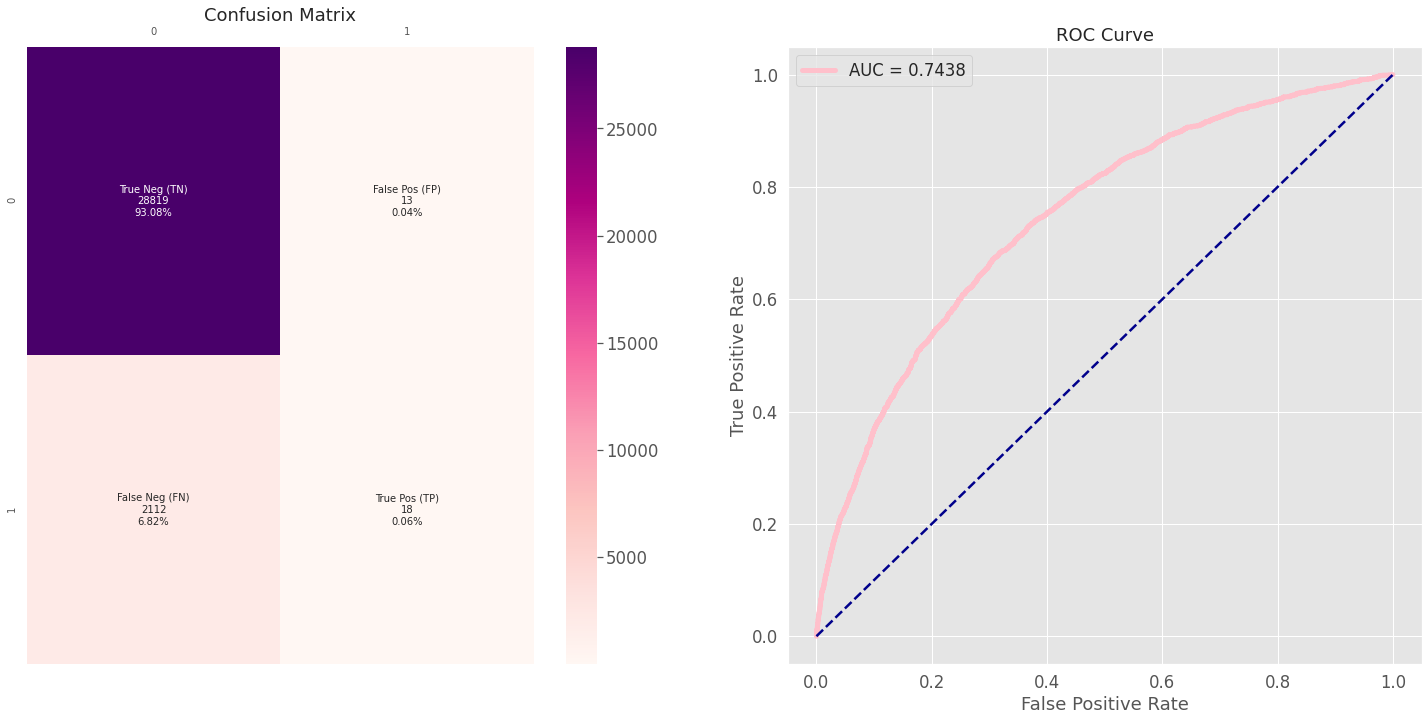

True negative =  28819
False positive =  13
False negative =  2112
True positive =  18
time: 1.03 s (started: 2021-08-03 08:37:13 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6013539513196215

time: 6.75 ms (started: 2021-08-03 08:37:14 +00:00)


Le modèle a une performance de plus de 90%. Plus de 90% de nos observations appartiennent à la catégorie 0 (non défaut de paiement), avec une exactitude (accuracy) de plus de 90% (ici 92%). Celà est caractéristique d'un déséquilibre des target. 

Pour pallier à ce déséquilibre, il faut rééquilibrer le jeu de données en faisant class_weight = balanced, de l’undersampling, en enlevant des données de la classe majoritaire, soit en faisant de l’oversampling, en rajoutant des nouvelles données dans la classe minoritaire.


In [ ]:
comparison_baseline = pd.DataFrame({})

comparison_baseline = comparison_baseline.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931367,0.743774,0.008451,0.016659,18,0.580645,2112,0.601354,0.02699


time: 21.4 ms (started: 2021-08-03 08:37:14 +00:00)


## <font color='blue'>Random Forest</font>

In [ ]:
best_params = RandomForestClassifier(n_estimators=900, criterion='gini', max_depth=25, min_samples_split=8, min_samples_leaf=11, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                     oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


time: 2.09 ms (started: 2021-08-03 08:37:14 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class = classification(best_params, X_train, y_train, X_test, y_test, "Baseline - Random Forest", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.034115
1          399406              0.056095
2          168652              0.127348
3          317387              0.059996
4          371921              0.164625
...           ...                   ...
30957      268716              0.040643
30958      398091              0.046714
30959      228535              0.043288
30960      107632              0.055015
30961      343857              0.165050

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9312059944448033 pour la méthode Baseline - Random Forest.
 
 
Le score de précision est de 0.0 pour la méthode Baseline - Random Forest.
 
 
Le score recall est de 0.0 pour la méthode Baseline - Random Forest.
 
 
Le score f1 est de 0.0 pour la méthode Baseline - Random Forest.
 
 
Le score AUC est de 0.7392904434561494 pour la méthode Baseline - Random Forest.
 
 
time: 8min 48s (started: 2021-08-03 08:37:14 +00:00)

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28832 (TN),0 (FP)
Real Positive (1),2130 (FN),0 (TP)


time: 17.4 ms (started: 2021-08-03 08:46:02 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7393
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.00      0.00      0.00      2130

    accuracy                           0.93     30962
   macro avg       0.47      0.50      0.48     30962
weighted avg       0.87      0.93      0.90     30962

time: 80.5 ms (started: 2021-08-03 08:46:02 +00:00)


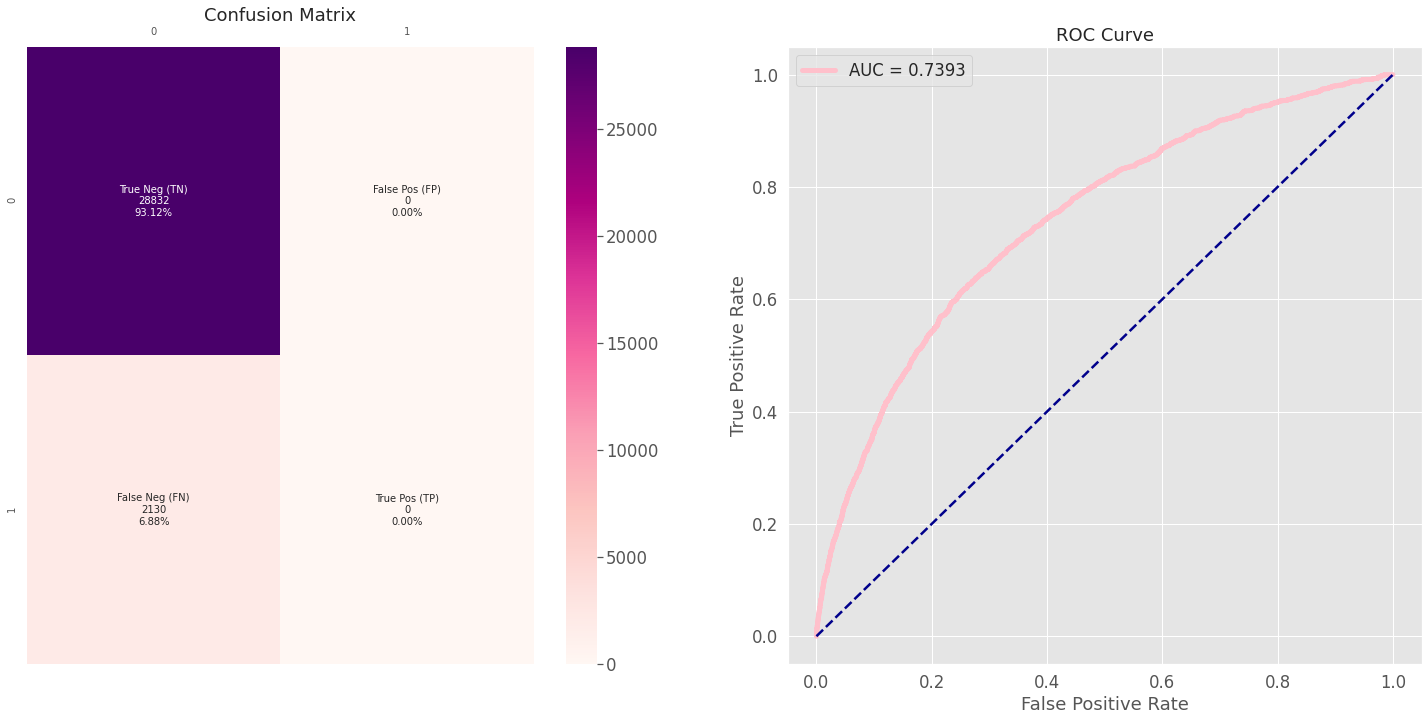

True negative =  28832
False positive =  0
False negative =  2130
True positive =  0
time: 913 ms (started: 2021-08-03 08:46:02 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.5982284326004618

time: 5.26 ms (started: 2021-08-03 08:46:03 +00:00)


In [ ]:
comparison_baseline = comparison_baseline.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - Random Forest",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931367,0.743774,0.008451,0.016659,18,0.580645,2112,0.601354,0.026990
1,Baseline - Random Forest,0.931206,0.739290,0.000000,0.000000,0,0.000000,2130,0.598228,9.093134


time: 21.6 ms (started: 2021-08-03 08:46:03 +00:00)


## <font color='blue'>XGBoost</font>

C’est une méthode ensembliste qui fait partie de la famille des algorithmes de boosting qui se base sur les arbres de décision et qui utilise plus particulièrement le boosting de gradient.


Cet algorithme construit un modèle faible qui donne de très mauvais résultats, il tire des conclusions sur les erreurs qui existent entre la prédiction et la réalité. A partir de ces conclusions et des conditions prises lors de la création du premier arbre, il va construire un modèle plus solide en tentant de réduire l'erreur de prédiction du modèle précédent (prédiction des erreurs en donnant un poids élevé aux mauvaises prédictions de l'arbre précédent pour ne plus la refaire). Il s'agit ici d'un système itératif car la formation de l'arbre au temps T à besoin que l'arbre T-1 soit formé pour pouvoir prédire et améliorer les erreurs sur le modèle.

Il fait grandir l'arbre de façon horizontale.

In [ ]:
best_params = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

time: 3.45 ms (started: 2021-08-03 08:46:03 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Baseline - XGBoost", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.002764
1          399406              0.002749
2          168652              0.004167
3          317387              0.010965
4          371921              0.107235
...           ...                   ...
30957      268716              0.001174
30958      398091              0.002329
30959      228535              0.001285
30960      107632              0.001667
30961      343857              0.040994

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9314320780311349 pour la méthode Baseline - XGBoost.
 
 
Le score de précision est de 0.5686274509803921 pour la méthode Baseline - XGBoost.
 
 
Le score recall est de 0.013615023474178404 pour la méthode Baseline - XGBoost.
 
 
Le score f1 est de 0.026593305823016965 pour la méthode Baseline - XGBoost.
 
 
Le score AUC est de 0.7429084647079667 pour la méthode Baseline - XGBoost.
 
 
time: 9min 6s (started: 2021-08-0

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28810 (TN),22 (FP)
Real Positive (1),2101 (FN),29 (TP)


time: 17 ms (started: 2021-08-03 08:55:10 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7429
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.57      0.01      0.03      2130

    accuracy                           0.93     30962
   macro avg       0.75      0.51      0.50     30962
weighted avg       0.91      0.93      0.90     30962

time: 79.6 ms (started: 2021-08-03 08:55:10 +00:00)


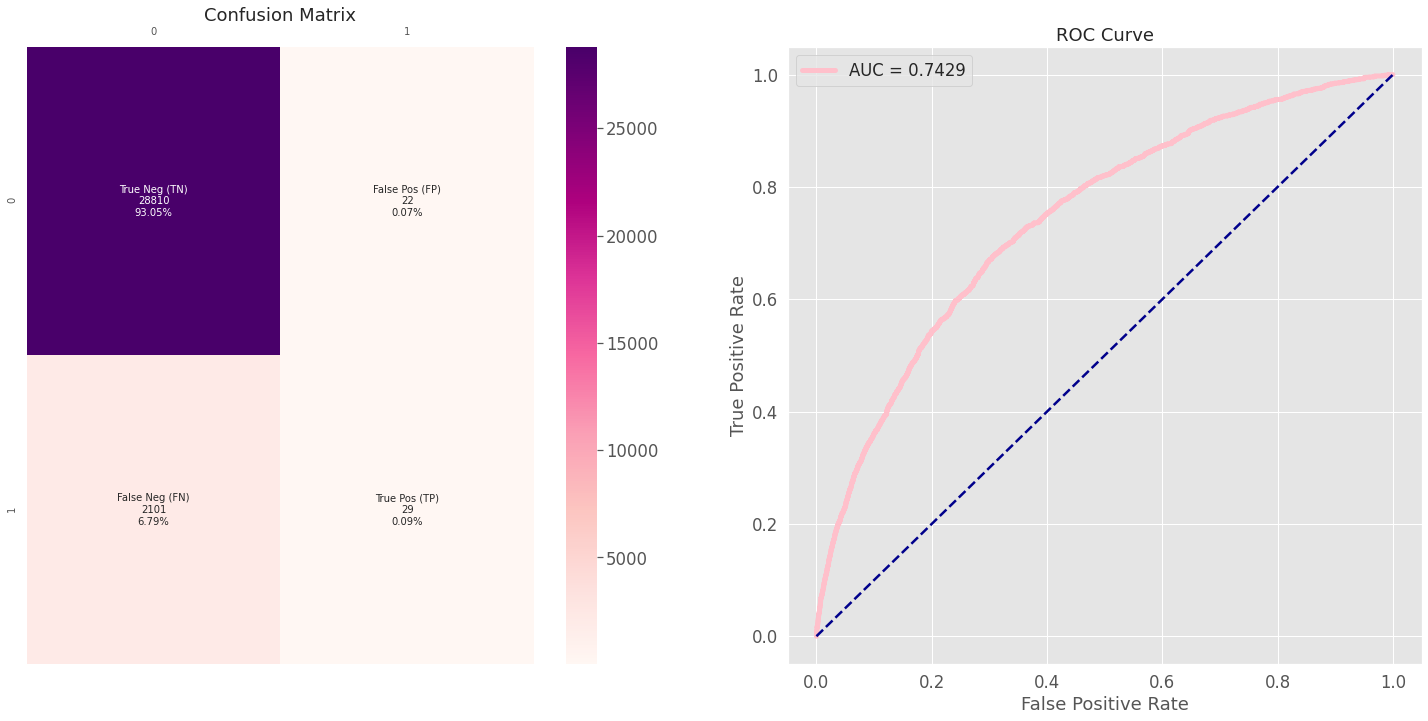

True negative =  28810
False positive =  22
False negative =  2101
True positive =  29
time: 824 ms (started: 2021-08-03 08:55:10 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6032420890612503

time: 6.93 ms (started: 2021-08-03 08:55:11 +00:00)


In [ ]:
comparison_baseline = comparison_baseline.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - XGBoost",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[2],
    )
)

comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931367,0.743774,0.008451,0.016659,18,0.580645,2112,0.601354,0.026990
1,Baseline - Random Forest,0.931206,0.739290,0.000000,0.000000,0,0.000000,2130,0.598228,9.093134
2,Baseline - XGBoost,0.931432,0.742908,0.013615,0.026593,29,0.568627,2101,0.603242,1.080430


time: 20.6 ms (started: 2021-08-03 08:55:11 +00:00)


## <font color='blue'>LGBMClassifier</font>

Même fonctionnement qu pour XGBoost sauf que l'arbre grandit verticalement.

In [ ]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 2.96 ms (started: 2021-08-03 08:55:11 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Baseline - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.038149
1          399406              0.044335
2          168652              0.087132
3          317387              0.048526
4          371921              0.202600
...           ...                   ...
30957      268716              0.053958
30958      398091              0.028901
30959      228535              0.032704
30960      107632              0.043992
30961      343857              0.105253

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9312059944448033 pour la méthode Baseline - LGBMClassifier.
 
 
Le score de précision est de 0.5 pour la méthode Baseline - LGBMClassifier.
 
 
Le score recall est de 0.009389671361502348 pour la méthode Baseline - LGBMClassifier.
 
 
Le score f1 est de 0.018433179723502304 pour la méthode Baseline - LGBMClassifier.
 
 
Le score AUC est de 0.7614803810841371 pour la méthode Baseline - LGBMClassifier.
 
 
time: 52.8 s 

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28812 (TN),20 (FP)
Real Positive (1),2110 (FN),20 (TP)


time: 16.6 ms (started: 2021-08-03 08:56:03 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7615
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.50      0.01      0.02      2130

    accuracy                           0.93     30962
   macro avg       0.72      0.50      0.49     30962
weighted avg       0.90      0.93      0.90     30962

time: 81.3 ms (started: 2021-08-03 08:56:03 +00:00)


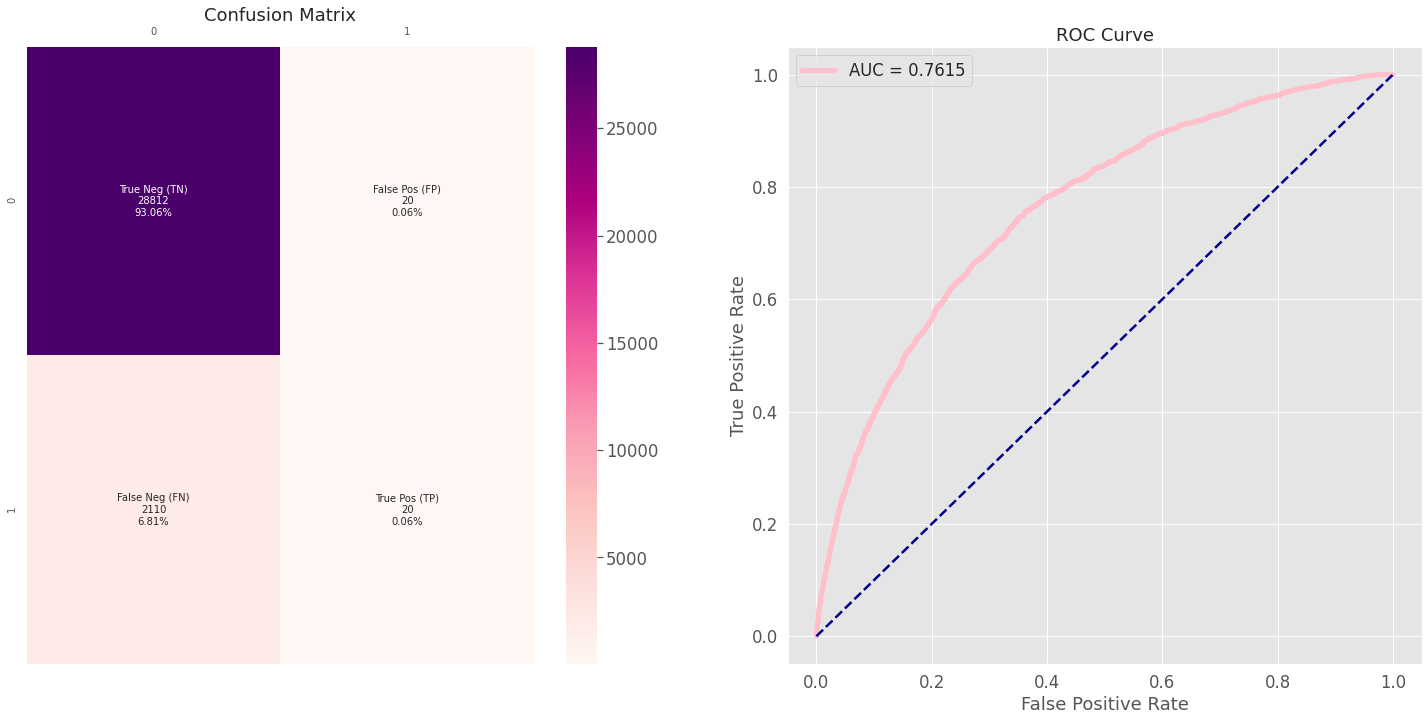

True negative =  28812
False positive =  20
False negative =  2110
True positive =  20
time: 794 ms (started: 2021-08-03 08:56:04 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6015859602529086

time: 7.75 ms (started: 2021-08-03 08:56:04 +00:00)


In [ ]:
comparison_baseline = comparison_baseline.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[3],
    )
)

comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931367,0.743774,0.008451,0.016659,18,0.580645,2112,0.601354,0.026990
1,Baseline - Random Forest,0.931206,0.739290,0.000000,0.000000,0,0.000000,2130,0.598228,9.093134
2,Baseline - XGBoost,0.931432,0.742908,0.013615,0.026593,29,0.568627,2101,0.603242,1.080430
3,Baseline - LGBMClassifier,0.931206,0.761480,0.009390,0.018433,20,0.500000,2110,0.601586,1.161368


time: 23.9 ms (started: 2021-08-03 08:56:04 +00:00)


# <font color='green'>Traitement du déséquilibre : The “Imbalanced classification problem" </font>

## <font color='blue'>Class_weight</font>

class_weight=’balanced’

xgboost : scale_pos_weight = sum(y_train_undersampled==1) / sum(y_train_undersampled==0)

### <font color='grey'>Régression logistique</font>

In [ ]:
best_params = LogisticRegression(C=0.1, class_weight='balanced', dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 2.58 ms (started: 2021-08-03 08:56:04 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class = classification(best_params, X_train, y_train, X_test, y_test, "Class Weight - Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.329075
1          399406              0.316508
2          168652              0.585407
3          317387              0.206957
4          371921              0.708904
...           ...                   ...
30957      268716              0.442542
30958      398091              0.170805
30959      228535              0.298998
30960      107632              0.369810
30961      343857              0.663740

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6879723532071571 pour la méthode Class Weight - Regression logistique.
 
 
Le score de précision est de 0.1375493310231976 pour la méthode Class Weight - Regression logistique.
 
 
Le score recall est de 0.6708920187793427 pour la méthode Class Weight - Regression logistique.
 
 
Le score f1 est de 0.22829299464813485 pour la méthode Class Weight - Regression logistique.
 
 
Le score AUC est de 0.7438174947762789 pour

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19872 (TN),8960 (FP)
Real Positive (1),701 (FN),1429 (TP)


time: 15.6 ms (started: 2021-08-03 08:56:10 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7438
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80     28832
         1.0       0.14      0.67      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.68      0.52     30962
weighted avg       0.91      0.69      0.76     30962

time: 88.1 ms (started: 2021-08-03 08:56:10 +00:00)


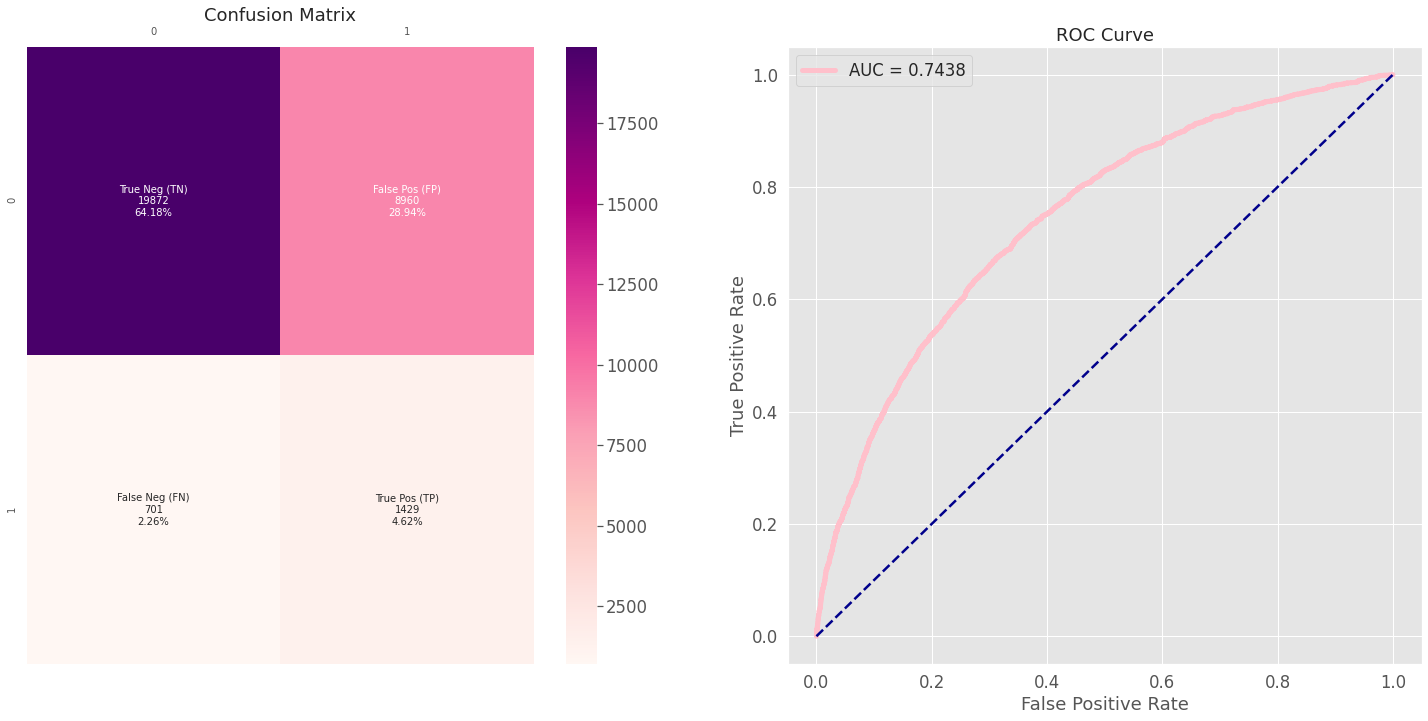

True negative =  19872
False positive =  8960
False negative =  701
True positive =  1429
time: 832 ms (started: 2021-08-03 08:56:10 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6818648236732107

time: 8.54 ms (started: 2021-08-03 08:56:10 +00:00)


In [ ]:
comparison_class_weight = pd.DataFrame({})

comparison_class_weight = comparison_class_weight.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687972,0.743817,0.670892,0.228293,1429,0.137549,701,0.681865,0.024788


time: 19.4 ms (started: 2021-08-03 08:56:11 +00:00)


### <font color='grey'>Random Forest</font>

In [ ]:
best_params = RandomForestClassifier(n_estimators=900, criterion='gini', max_depth=25, min_samples_split=8, min_samples_leaf=11, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                     oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight='balanced', ccp_alpha=0.0, max_samples=None)


time: 2.74 ms (started: 2021-08-03 08:56:11 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Class Weight - Random Forest", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.137574
1          399406              0.181858
2          168652              0.337527
3          317387              0.183094
4          371921              0.441701
...           ...                   ...
30957      268716              0.184911
30958      398091              0.186676
30959      228535              0.149074
30960      107632              0.255245
30961      343857              0.465075

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9220657580259674 pour la méthode Class Weight - Random Forest.
 
 
Le score de précision est de 0.3140604467805519 pour la méthode Class Weight - Random Forest.
 
 
Le score recall est de 0.11220657276995305 pour la méthode Class Weight - Random Forest.
 
 
Le score f1 est de 0.16534071255620894 pour la méthode Class Weight - Random Forest.
 
 
Le score AUC est de 0.740505088894447 pour la méthode Class Weight - Rando

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28310 (TN),522 (FP)
Real Positive (1),1891 (FN),239 (TP)


time: 16.4 ms (started: 2021-08-03 09:04:34 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7405
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     28832
         1.0       0.31      0.11      0.17      2130

    accuracy                           0.92     30962
   macro avg       0.63      0.55      0.56     30962
weighted avg       0.89      0.92      0.90     30962

time: 81.4 ms (started: 2021-08-03 09:04:34 +00:00)


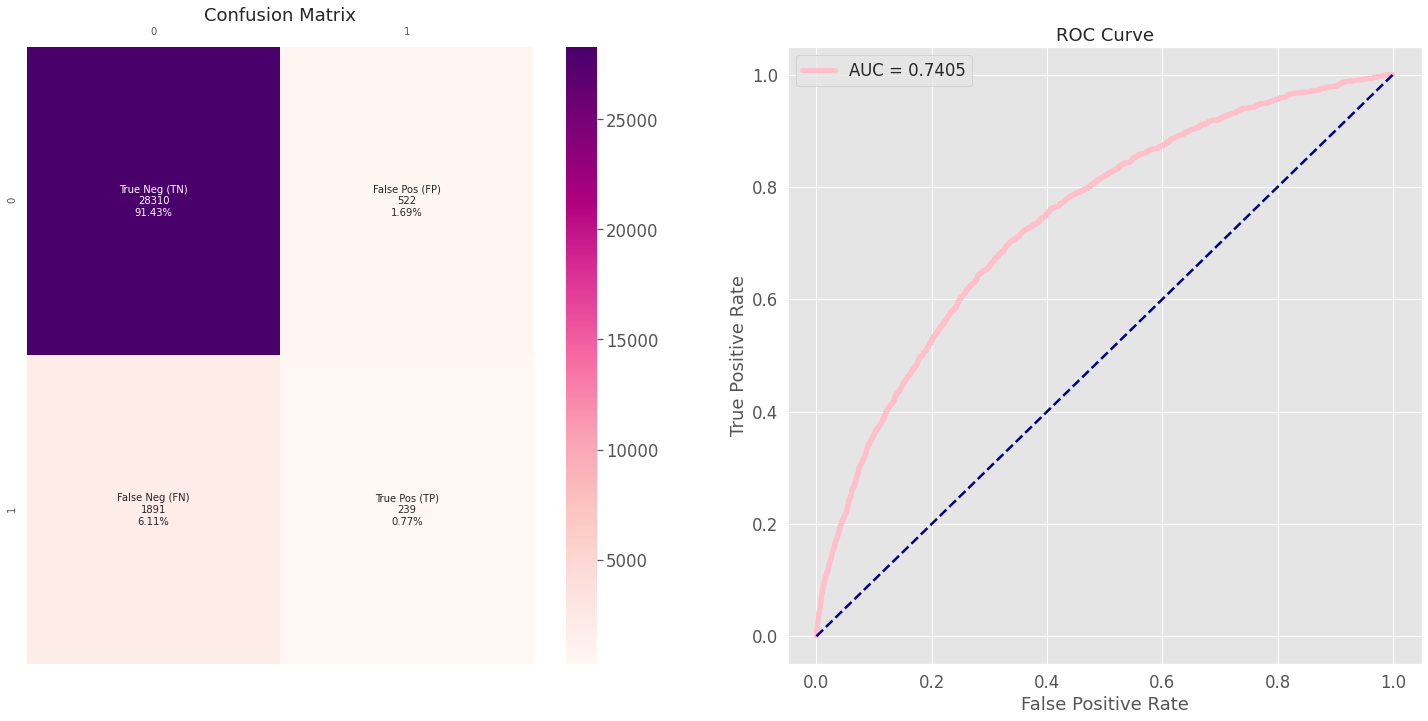

True negative =  28310
False positive =  522
False negative =  1891
True positive =  239
time: 795 ms (started: 2021-08-03 09:04:34 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6324789871583999

time: 4 ms (started: 2021-08-03 09:04:35 +00:00)


In [ ]:
comparison_class_weight = comparison_class_weight.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - Random Forest",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687972,0.743817,0.670892,0.228293,1429,0.137549,701,0.681865,0.024788
1,Class Weight - Random Forest,0.922066,0.740505,0.112207,0.165341,239,0.314060,1891,0.632479,8.685499


time: 24.4 ms (started: 2021-08-03 09:04:35 +00:00)


### <font color='grey'>XGBoost</font>

In [ ]:
best_params = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=sum(y_train==1) / sum(y_train==0), seed=0, silent=True, subsample=1)

time: 35.8 ms (started: 2021-08-03 09:04:35 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Class Weight - Random Forest", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.002458
1          399406              0.007773
2          168652              0.006935
3          317387              0.017250
4          371921              0.027980
...           ...                   ...
30957      268716              0.001333
30958      398091              0.000570
30959      228535              0.000510
30960      107632              0.006184
30961      343857              0.005528

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9313997803759447 pour la méthode Class Weight - Random Forest.
 
 
Le score de précision est de 0.875 pour la méthode Class Weight - Random Forest.
 
 
Le score recall est de 0.0032863849765258214 pour la méthode Class Weight - Random Forest.
 
 
Le score f1 est de 0.006548175865294667 pour la méthode Class Weight - Random Forest.
 
 
Le score AUC est de 0.7463163402817944 pour la méthode Class Weight - Random Forest.

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28831 (TN),1 (FP)
Real Positive (1),2123 (FN),7 (TP)


time: 16.5 ms (started: 2021-08-03 09:11:11 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7463
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.88      0.00      0.01      2130

    accuracy                           0.93     30962
   macro avg       0.90      0.50      0.49     30962
weighted avg       0.93      0.93      0.90     30962

time: 79.8 ms (started: 2021-08-03 09:11:11 +00:00)


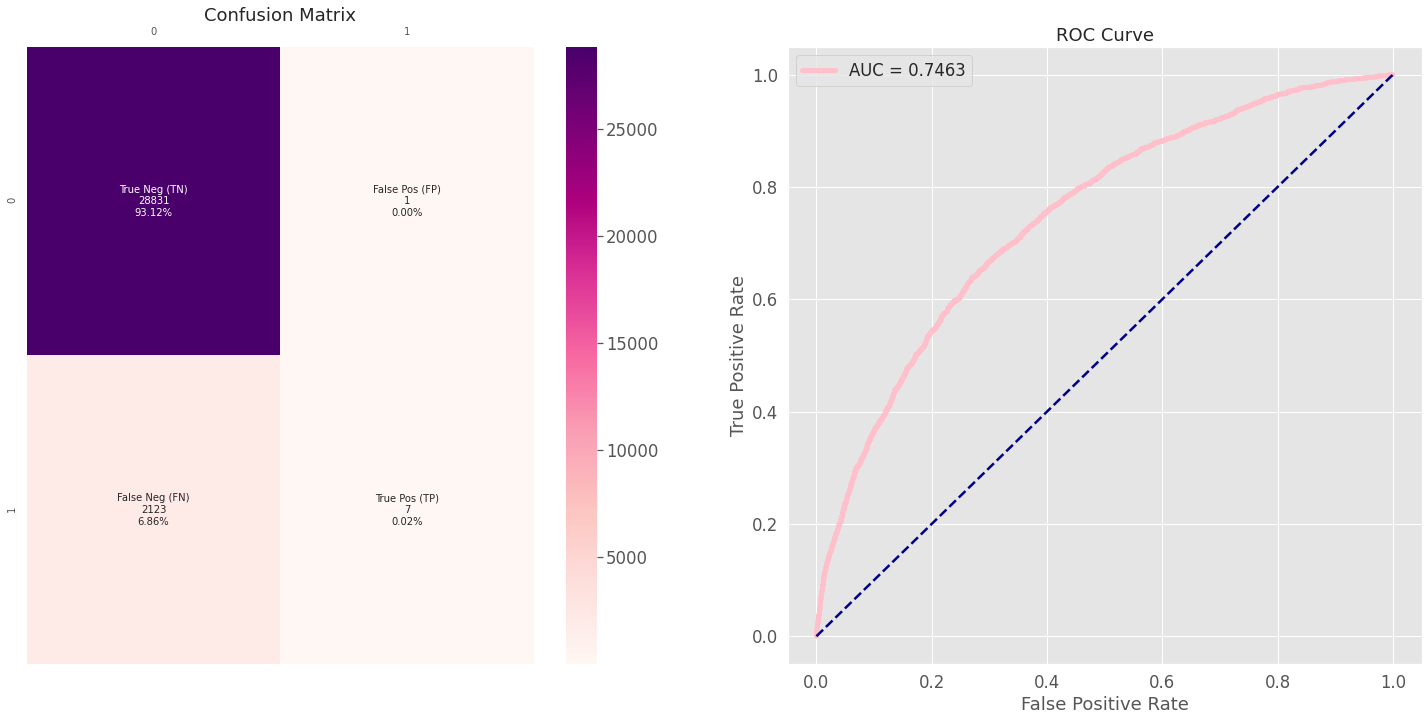

True negative =  28831
False positive =  1
False negative =  2123
True positive =  7
time: 811 ms (started: 2021-08-03 09:11:11 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.5995280598771673

time: 4.46 ms (started: 2021-08-03 09:11:12 +00:00)


In [ ]:
comparison_class_weight = comparison_class_weight.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - XGBoost",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[2],
    )
)

comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687972,0.743817,0.670892,0.228293,1429,0.137549,701,0.681865,0.024788
1,Class Weight - Random Forest,0.922066,0.740505,0.112207,0.165341,239,0.314060,1891,0.632479,8.685499
2,Class Weight - XGBoost,0.931400,0.746316,0.003286,0.006548,7,0.875000,2123,0.599528,0.507073


time: 21.9 ms (started: 2021-08-03 09:11:12 +00:00)


### <font color='grey'>LGBMClassifier</font>

In [ ]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight='balanced', min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 2.59 ms (started: 2021-08-03 09:11:12 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train, y_train, X_test, y_test, "Class Weight - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.267524
1          399406              0.339743
2          168652              0.479532
3          317387              0.298153
4          371921              0.761307
...           ...                   ...
30957      268716              0.346750
30958      398091              0.323931
30959      228535              0.238034
30960      107632              0.353383
30961      343857              0.535671

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.7411665913054712 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score de précision est de 0.15702961063184892 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score recall est de 0.6323943661971831 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score f1 est de 0.25158759805752706 pour la méthode Class Weight - LGBMClassifier.
 
 
Le score AUC est de 0.7601222787148344 pour la méthode Class Weight - 

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),21601 (TN),7231 (FP)
Real Positive (1),783 (FN),1347 (TP)


time: 17.9 ms (started: 2021-08-03 09:12:08 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7601
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     28832
         1.0       0.16      0.63      0.25      2130

    accuracy                           0.74     30962
   macro avg       0.56      0.69      0.55     30962
weighted avg       0.91      0.74      0.80     30962

time: 88.1 ms (started: 2021-08-03 09:12:08 +00:00)


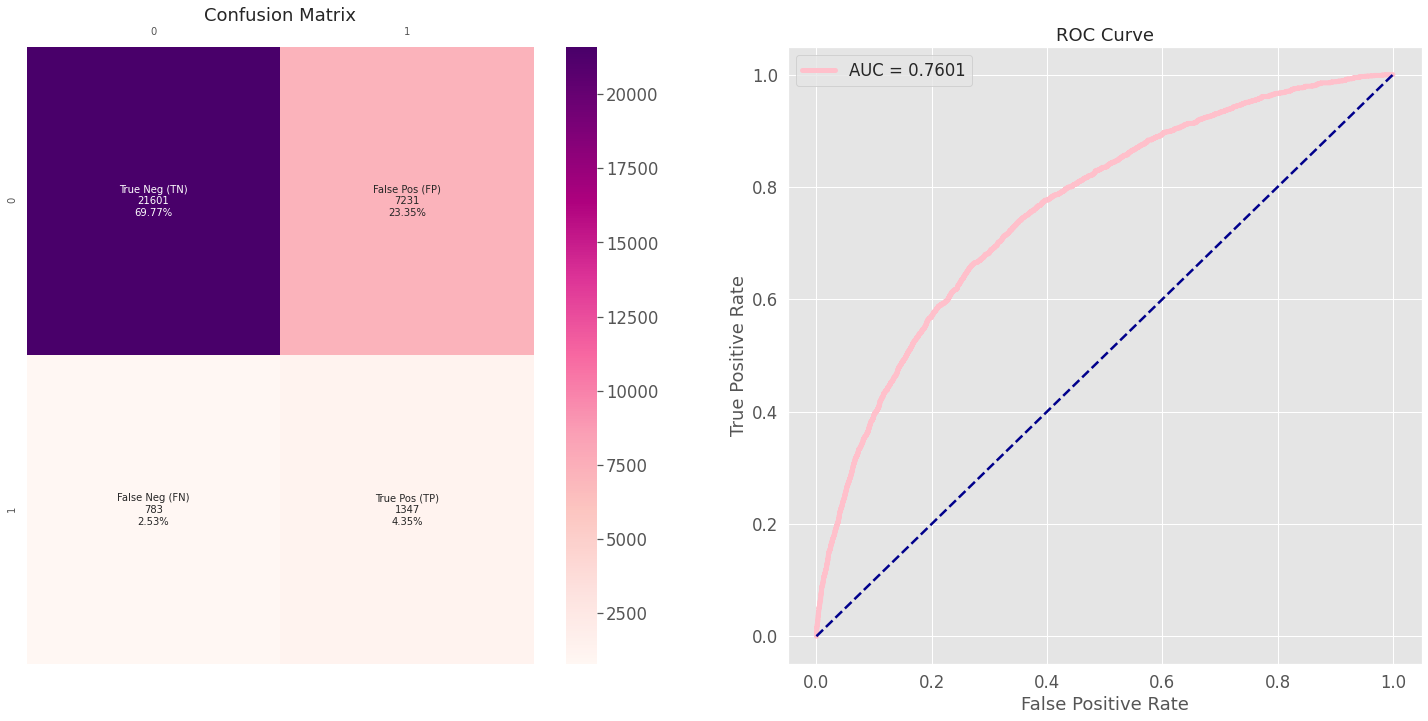

True negative =  21601
False positive =  7231
False negative =  783
True positive =  1347
time: 832 ms (started: 2021-08-03 09:12:08 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.702272178545021

time: 5.83 ms (started: 2021-08-03 09:12:09 +00:00)


In [ ]:
comparison_class_weight = comparison_class_weight.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[3],
    )
)

comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687972,0.743817,0.670892,0.228293,1429,0.137549,701,0.681865,0.024788
1,Class Weight - Random Forest,0.922066,0.740505,0.112207,0.165341,239,0.314060,1891,0.632479,8.685499
2,Class Weight - XGBoost,0.931400,0.746316,0.003286,0.006548,7,0.875000,2123,0.599528,0.507073
3,Class Weight - LGBMClassifier,0.741167,0.760122,0.632394,0.251588,1347,0.157030,783,0.702272,1.237642


time: 21.2 ms (started: 2021-08-03 09:12:09 +00:00)


## <font color='blue'>Undersampling</font>

### <font color='grey'>Mise en place</font>

Supprimez aléatoirement les exemples de la classe majoritaire. Le sous-échantillonnage aléatoire consiste à sélectionner au hasard des exemples de la classe majoritaire et à les supprimer de l'ensemble de données d'apprentissage.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

time: 877 µs (started: 2021-08-03 09:12:09 +00:00)


In [ ]:
print("Label 1, Before using RandomUnderSampler: {} ".format(sum(y_train==1)))
print("Label 0, Before using RandomUnderSampler: {} ".format(sum(y_train==0)))

Label 1, Before using RandomUnderSampler: 8654 
Label 0, Before using RandomUnderSampler: 115191 
time: 32.8 ms (started: 2021-08-03 09:12:09 +00:00)


In [ ]:
rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_sample(X_train, y_train)
X_train_undersampled = pd.DataFrame(X_train_undersampled, columns=X_train.columns)

time: 157 ms (started: 2021-08-03 09:12:09 +00:00)


In [ ]:
print("Label 1, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==1)))
print("Label 0, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==0)))

Label 1, After using RandomUnderSampler: 8654
Label 0, After using RandomUnderSampler: 8654
time: 83.7 ms (started: 2021-08-03 09:12:09 +00:00)


In [ ]:
X_train_undersampled

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,...,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Business_Entity_Type_3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry:_type_1,ORGANIZATION_TYPE_Industry:_type_10,ORGANIZATION_TYPE_Industry:_type_11,ORGANIZATION_TYPE_Industry:_type_12,ORGANIZATION_TYPE_Industry:_type_13,ORGANIZATION_TYPE_Industry:_type_2,ORGANIZATION_TYPE_Industry:_type_3,ORGANIZATION_TYPE_Industry:_type_4,ORGANIZATION_TYPE_Industry:_type_5,ORGANIZATION_TYPE_Industry:_type_6,ORGANIZATION_TYPE_Industry:_type_7,ORGANIZATION_TYPE_Industry:_type_9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal_Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security_Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade:_type_1,ORGANIZATION_TYPE_Trade:_type_2,ORGANIZATION_TYPE_Trade:_type_3,ORGANIZATION_TYPE_Trade:_type_4,ORGANIZATION_TYPE_Trade:_type_5,ORGANIZATION_TYPE_Trade:_type_6,ORGANIZATION_TYPE_Trade:_type_7,ORGANIZATION_TYPE_Transport:_type_1,ORGANIZATION_TYPE_Transport:_type_2,ORGANIZATION_TYPE_Transport:_type_3,ORGANIZATION_TYPE_Transport:_type_4,ORGANIZATION_TYPE_University,HOUSETYPE_MODE_block_of_flats,HOUSETYPE_MODE_specific_housing,HOUSETYPE_MODE_terraced_house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone,_brick",WALLSMATERIAL_MODE_Wooden,MOST_CREDIT_TYPE_Another_type_of_loan,MOST_CREDIT_TYPE_Car_loan,MOST_CREDIT_TYPE_Consumer_credit,MOST_CREDIT_TYPE_Credit_card,MOST_CREDIT_TYPE_Loan_for_business_development,MOST_CREDIT_TYPE_Loan_for_working_capital_replenishment,MOST_CREDIT_TYPE_Microloan,MOST_CREDIT_TYPE_Mortgage,MOST_CREDIT_TYPE_Unknown_type_of_loan
0,0.0,1.0,1.0,0.0,0.0,-0.573222,-0.144815,-0.565139,-1.142550,-0.800416,0.018732,-1.090908,-0.853139,1.039624,-0.273951,0.002542,0.458151,-0.46321,0.047807,-0.671139,-0.267116,-0.108965,0.032789,0.100683,0.510382,-0.110786,-0.220085,-0.202500,-0.193282,-0.370518,-0.338066,-0.347398,0.148958,-0.635273,-0.187222,0.

time: 190 ms (started: 2021-08-03 09:12:10 +00:00)


### <font color='grey'>Régression logistique</font>

In [ ]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 1.89 ms (started: 2021-08-03 09:12:10 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_undersampled, y_train_undersampled, X_test, y_test, "RandomUnderSampler Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.319430
1          399406              0.289152
2          168652              0.610002
3          317387              0.225347
4          371921              0.598334
...           ...                   ...
30957      268716              0.490017
30958      398091              0.184434
30959      228535              0.318216
30960      107632              0.392071
30961      343857              0.657103

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6787029261675602 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score de précision est de 0.1334396099024756 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score recall est de 0.668075117370892 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score f1 est de 0.22244802251055182 pour la méthode RandomUnderSampler Regression logistique.
 
 
Le score AUC est de 0.740488

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19591 (TN),9241 (FP)
Real Positive (1),707 (FN),1423 (TP)


time: 16.7 ms (started: 2021-08-03 09:12:11 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7405
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     28832
         1.0       0.13      0.67      0.22      2130

    accuracy                           0.68     30962
   macro avg       0.55      0.67      0.51     30962
weighted avg       0.91      0.68      0.76     30962

time: 92.2 ms (started: 2021-08-03 09:12:11 +00:00)


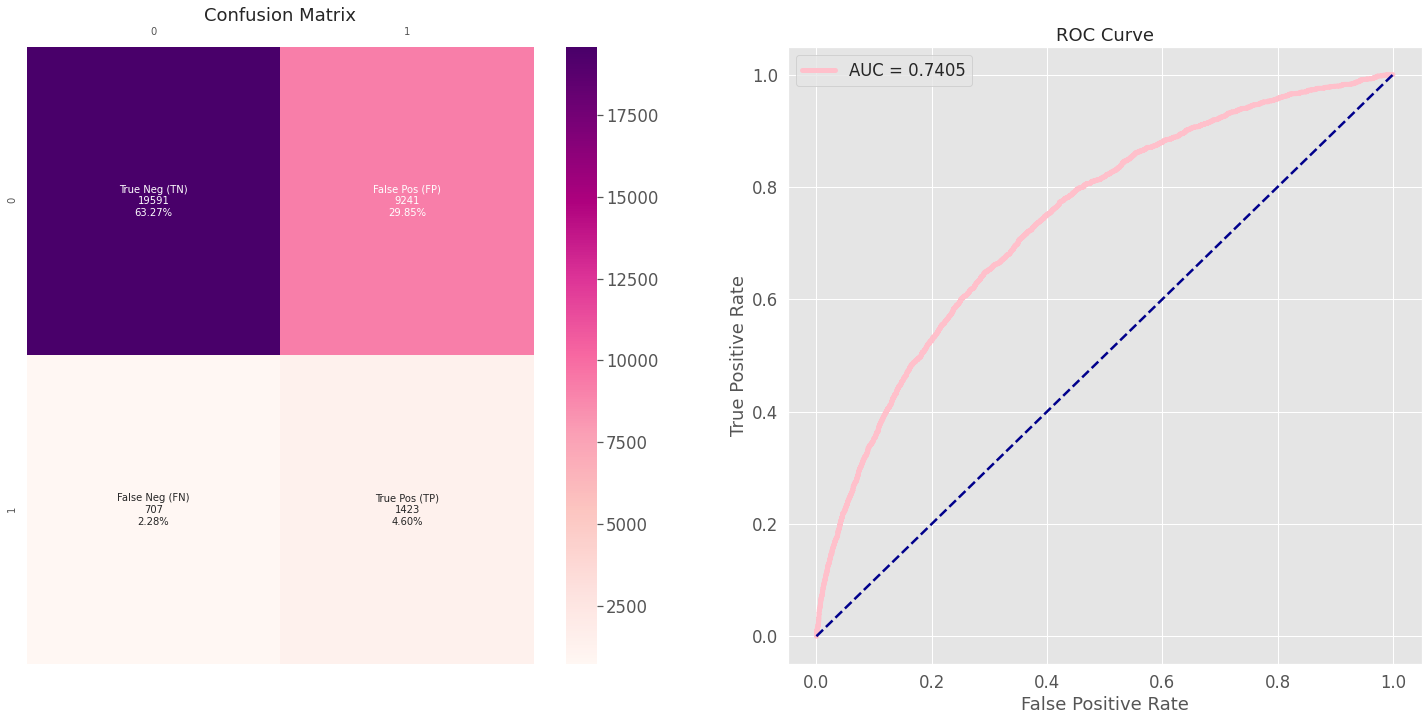

True negative =  19591
False positive =  9241
False negative =  707
True positive =  1423
time: 919 ms (started: 2021-08-03 09:12:11 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6749026694231088

time: 6.44 ms (started: 2021-08-03 09:12:12 +00:00)


In [ ]:
comparison_RandomUnderSampler = pd.DataFrame({})

comparison_RandomUnderSampler = comparison_RandomUnderSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678703,0.740488,0.668075,0.222448,1423,0.13344,707,0.674903,0.027993


time: 20.6 ms (started: 2021-08-03 09:12:12 +00:00)


### <font color='grey'>Random Forest</font>

In [ ]:
best_params = RandomForestClassifier(n_estimators=900, criterion='gini', max_depth=25, min_samples_split=8, min_samples_leaf=11, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                     oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

time: 2.89 ms (started: 2021-08-03 09:12:12 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_undersampled, y_train_undersampled, X_test, y_test, "RandomUnderSampler - Random Forest", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.364539
1          399406              0.386461
2          168652              0.541566
3          317387              0.399412
4          371921              0.684152
...           ...                   ...
30957      268716              0.430241
30958      398091              0.424153
30959      228535              0.323226
30960      107632              0.491917
30961      343857              0.664939

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6822233705832956 pour la méthode RandomUnderSampler - Random Forest.
 
 
Le score de précision est de 0.13467917732916312 pour la méthode RandomUnderSampler - Random Forest.
 
 
Le score recall est de 0.6671361502347418 pour la méthode RandomUnderSampler - Random Forest.
 
 
Le score f1 est de 0.22411481744341932 pour la méthode RandomUnderSampler - Random Forest.
 
 
Le score AUC est de 0.7343581303767853 pour la mét

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19702 (TN),9130 (FP)
Real Positive (1),709 (FN),1421 (TP)


time: 16.4 ms (started: 2021-08-03 09:13:13 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7344
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     28832
         1.0       0.13      0.67      0.22      2130

    accuracy                           0.68     30962
   macro avg       0.55      0.68      0.51     30962
weighted avg       0.91      0.68      0.76     30962

time: 90.4 ms (started: 2021-08-03 09:13:13 +00:00)


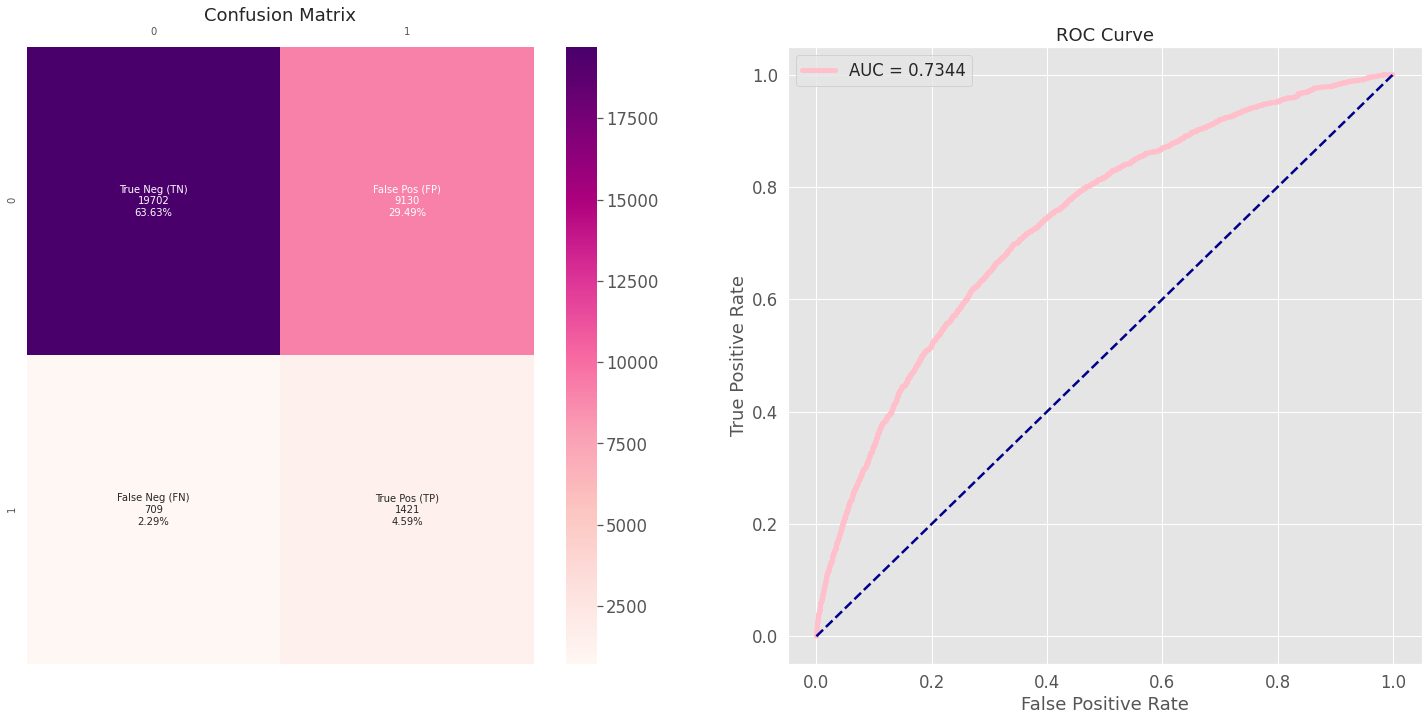

True negative =  19702
False positive =  9130
False negative =  709
True positive =  1421
time: 845 ms (started: 2021-08-03 09:13:13 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6768285321945404

time: 6.55 ms (started: 2021-08-03 09:13:14 +00:00)


In [ ]:
comparison_RandomUnderSampler = comparison_RandomUnderSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - Random Forest",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678703,0.740488,0.668075,0.222448,1423,0.133440,707,0.674903,0.027993
1,RandomUnderSampler - Random Forest,0.682223,0.734358,0.667136,0.224115,1421,0.134679,709,0.676829,6.827241


time: 20.2 ms (started: 2021-08-03 09:13:14 +00:00)


### <font color='grey'>XGBoost</font>

In [ ]:
best_params = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

time: 2.26 ms (started: 2021-08-03 09:13:14 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_undersampled, y_train_undersampled, X_test, y_test, "RandomUnderSampler - XGBoost", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.072176
1          399406              0.066923
2          168652              0.736124
3          317387              0.158687
4          371921              0.947243
...           ...                   ...
30957      268716              0.326457
30958      398091              0.326662
30959      228535              0.081546
30960      107632              0.126982
30961      343857              0.565719

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6808022737549254 pour la méthode RandomUnderSampler - XGBoost.
 
 
Le score de précision est de 0.1358384217942696 pour la méthode RandomUnderSampler - XGBoost.
 
 
Le score recall est de 0.6788732394366197 pour la méthode RandomUnderSampler - XGBoost.
 
 
Le score f1 est de 0.22637964774951075 pour la méthode RandomUnderSampler - XGBoost.
 
 
Le score AUC est de 0.7425685238884286 pour la méthode RandomUnderSampler -

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19633 (TN),9199 (FP)
Real Positive (1),684 (FN),1446 (TP)


time: 18.5 ms (started: 2021-08-03 09:14:12 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7426
              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     28832
         1.0       0.14      0.68      0.23      2130

    accuracy                           0.68     30962
   macro avg       0.55      0.68      0.51     30962
weighted avg       0.91      0.68      0.76     30962

time: 90.4 ms (started: 2021-08-03 09:14:13 +00:00)


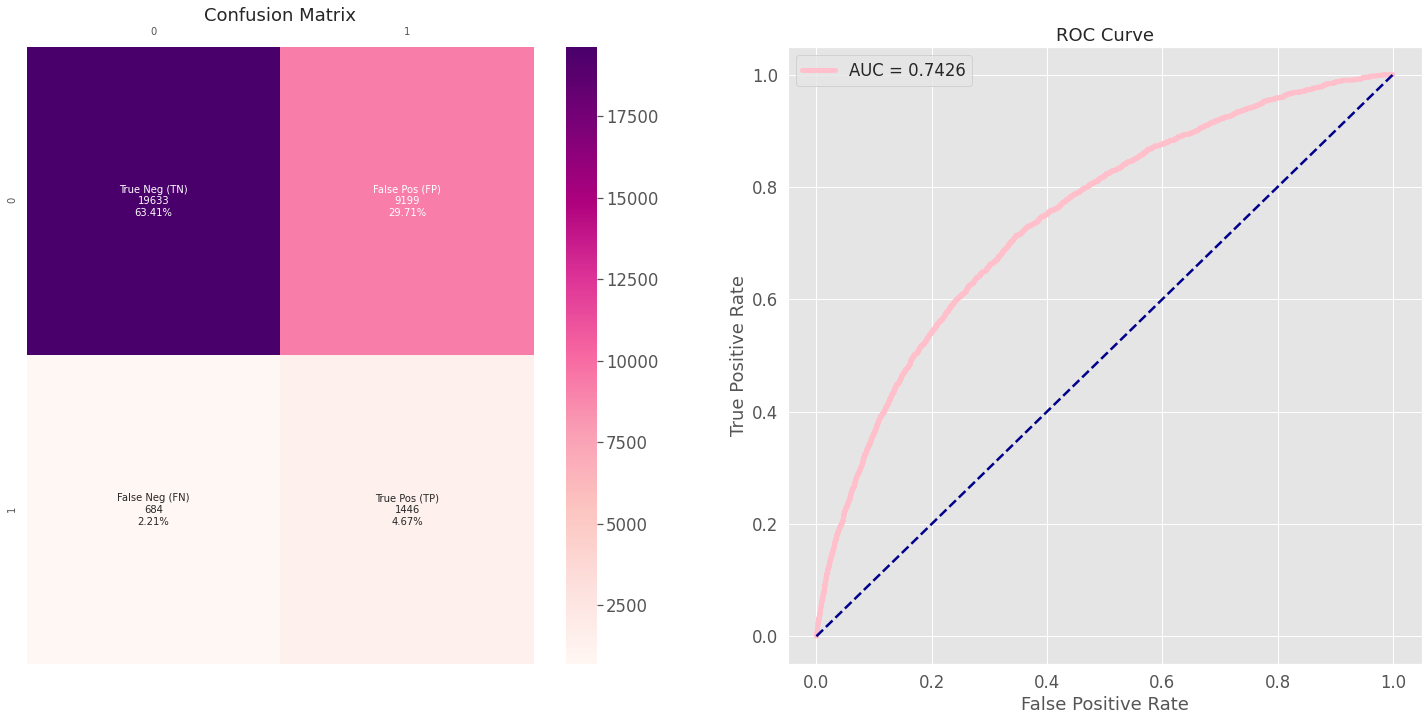

True negative =  19633
False positive =  9199
False negative =  684
True positive =  1446
time: 900 ms (started: 2021-08-03 09:14:13 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6801124960388719

time: 6.35 ms (started: 2021-08-03 09:14:14 +00:00)


In [ ]:
comparison_RandomUnderSampler = comparison_RandomUnderSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - XGBoost",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time":prediction_time
        },
        index=[2],
    )
)

comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678703,0.740488,0.668075,0.222448,1423,0.133440,707,0.674903,0.027993
1,RandomUnderSampler - Random Forest,0.682223,0.734358,0.667136,0.224115,1421,0.134679,709,0.676829,6.827241
2,RandomUnderSampler - XGBoost,0.680802,0.742569,0.678873,0.226380,1446,0.135838,684,0.680112,0.604397


time: 23 ms (started: 2021-08-03 09:14:14 +00:00)


### <font color='grey'>LGBMClassifier</font>




In [ ]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 2.98 ms (started: 2021-08-03 09:14:14 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_undersampled, y_train_undersampled, X_test, y_test, "RandomUnderSampler - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.289101
1          399406              0.311461
2          168652              0.485168
3          317387              0.306832
4          371921              0.745692
...           ...                   ...
30957      268716              0.410132
30958      398091              0.280990
30959      228535              0.310896
30960      107632              0.391125
30961      343857              0.363331

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6894257476907176 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score de précision est de 0.13995767602924203 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score recall est de 0.6830985915492958 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score f1 est de 0.23231678109532175 pour la méthode RandomUnderSampler - LGBMClassifier.
 
 
Le score AUC est de 0.7544529617587137 pour la

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19891 (TN),8941 (FP)
Real Positive (1),675 (FN),1455 (TP)


time: 16.6 ms (started: 2021-08-03 09:14:29 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7545
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     28832
         1.0       0.14      0.68      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.69      0.52     30962
weighted avg       0.91      0.69      0.77     30962

time: 86.9 ms (started: 2021-08-03 09:14:29 +00:00)


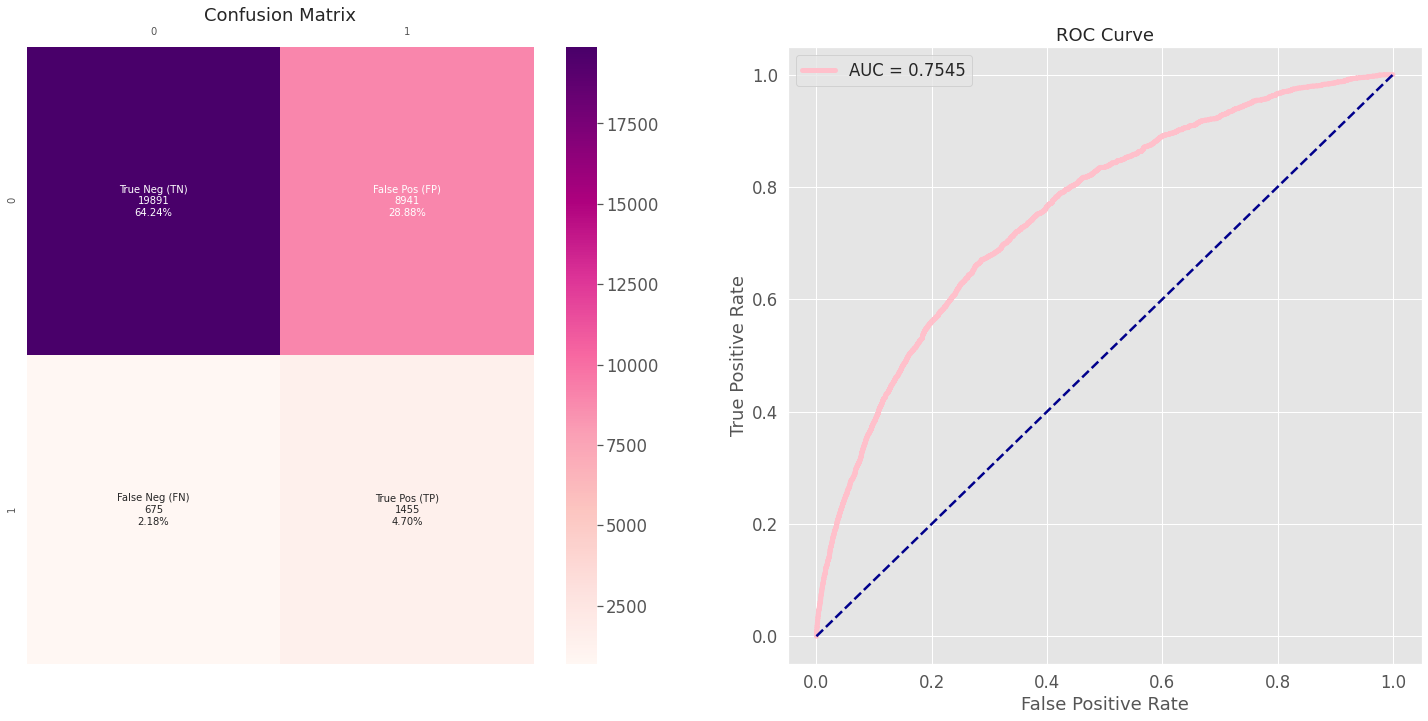

True negative =  19891
False positive =  8941
False negative =  675
True positive =  1455
time: 821 ms (started: 2021-08-03 09:14:29 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6871633041090103

time: 4.87 ms (started: 2021-08-03 09:14:30 +00:00)


In [ ]:
comparison_RandomUnderSampler = comparison_RandomUnderSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[3],
    )
)

comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678703,0.740488,0.668075,0.222448,1423,0.133440,707,0.674903,0.027993
1,RandomUnderSampler - Random Forest,0.682223,0.734358,0.667136,0.224115,1421,0.134679,709,0.676829,6.827241
2,RandomUnderSampler - XGBoost,0.680802,0.742569,0.678873,0.226380,1446,0.135838,684,0.680112,0.604397
3,RandomUnderSampler - LGBMClassifier,0.689426,0.754453,0.683099,0.232317,1455,0.139958,675,0.687163,1.307599


time: 21.3 ms (started: 2021-08-03 09:14:30 +00:00)


## <font color='blue'>Oversampling</font>

C'est une méthode qui va dupliquer aléatoirement des données existantes de la classe minoritaire pour que chaque classe ait le même nombre de données que la classe sur-représentée à l'origine.

### <font color='grey'>Mise en place</font>

In [ ]:
from imblearn.over_sampling import RandomOverSampler

time: 922 µs (started: 2021-08-03 09:14:30 +00:00)


In [ ]:
print("Label 1, Before using RandomOverSampler: {} ".format(sum(y_train==1)))
print("Label 0, Before using RandomOverSampler: {} ".format(sum(y_train==0)))

Label 1, Before using RandomOverSampler: 8654 
Label 0, Before using RandomOverSampler: 115191 
time: 31.2 ms (started: 2021-08-03 09:14:30 +00:00)


In [ ]:
ros = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = ros.fit_sample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)

time: 570 ms (started: 2021-08-03 09:14:30 +00:00)


In [ ]:
print("Label 1, After using RandomOverSampler: {}".format(sum(y_train_oversampled==1)))
print("Label 0, After using RandomOverSampler: {}".format(sum(y_train_oversampled==0)))

Label 1, After using RandomOverSampler: 115191
Label 0, After using RandomOverSampler: 115191
time: 1.06 s (started: 2021-08-03 09:14:31 +00:00)


### <font color='grey'>Régression logistique</font>

In [ ]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 2.18 ms (started: 2021-08-03 09:14:32 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_oversampled, y_train_oversampled, X_test, y_test, "RandomOverSampler Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.323191
1          399406              0.327776
2          168652              0.590729
3          317387              0.202060
4          371921              0.682004
...           ...                   ...
30957      268716              0.452239
30958      398091              0.182787
30959      228535              0.297848
30960      107632              0.364787
30961      343857              0.662743

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6881015438279181 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score de précision est de 0.1378812662368902 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score recall est de 0.6727699530516432 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score f1 est de 0.22885889962469053 pour la méthode RandomOverSampler Regression logistique.
 
 
Le score AUC est de 0.743488504

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19872 (TN),8960 (FP)
Real Positive (1),697 (FN),1433 (TP)


time: 15.5 ms (started: 2021-08-03 09:14:41 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7435
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.80     28832
         1.0       0.14      0.67      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.68      0.52     30962
weighted avg       0.91      0.69      0.76     30962

time: 88.4 ms (started: 2021-08-03 09:14:41 +00:00)


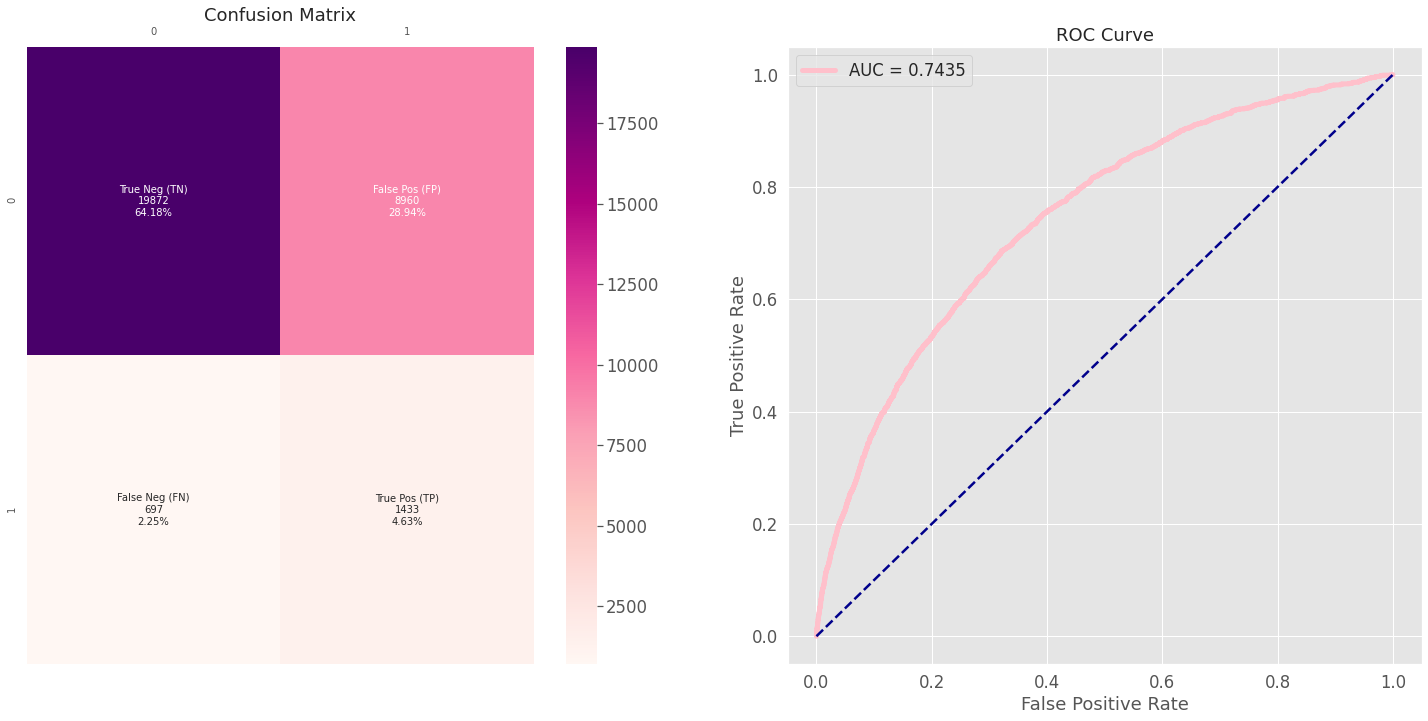

True negative =  19872
False positive =  8960
False negative =  697
True positive =  1433
time: 909 ms (started: 2021-08-03 09:14:41 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6826193242692662

time: 4.62 ms (started: 2021-08-03 09:14:42 +00:00)


In [ ]:
comparison_RandomOverSampler = pd.DataFrame({})

comparison_RandomOverSampler = comparison_RandomOverSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688102,0.743489,0.67277,0.228859,1433,0.137881,697,0.682619,0.025469


time: 21.5 ms (started: 2021-08-03 09:14:42 +00:00)


### <font color='grey'>Random Forest</font>

In [ ]:
best_params = RandomForestClassifier(n_estimators=900, criterion='gini', max_depth=25, min_samples_split=8, min_samples_leaf=11, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                     oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

time: 1.81 ms (started: 2021-08-03 09:14:42 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_oversampled, y_train_oversampled, X_test, y_test, "RandomOverSampler - Random Forest", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.128293
1          399406              0.183325
2          168652              0.344335
3          317387              0.162492
4          371921              0.440317
...           ...                   ...
30957      268716              0.153634
30958      398091              0.175796
30959      228535              0.120892
30960      107632              0.241589
30961      343857              0.467991

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9227440087849622 pour la méthode RandomOverSampler - Random Forest.
 
 
Le score de précision est de 0.3215258855585831 pour la méthode RandomOverSampler - Random Forest.
 
 
Le score recall est de 0.1107981220657277 pour la méthode RandomOverSampler - Random Forest.
 
 
Le score f1 est de 0.164804469273743 pour la méthode RandomOverSampler - Random Forest.
 
 
Le score AUC est de 0.7398769722478415 pour la méthode Ra

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28334 (TN),498 (FP)
Real Positive (1),1894 (FN),236 (TP)


time: 15.7 ms (started: 2021-08-03 09:29:47 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7399
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     28832
         1.0       0.32      0.11      0.16      2130

    accuracy                           0.92     30962
   macro avg       0.63      0.55      0.56     30962
weighted avg       0.89      0.92      0.90     30962

time: 82.3 ms (started: 2021-08-03 09:29:47 +00:00)


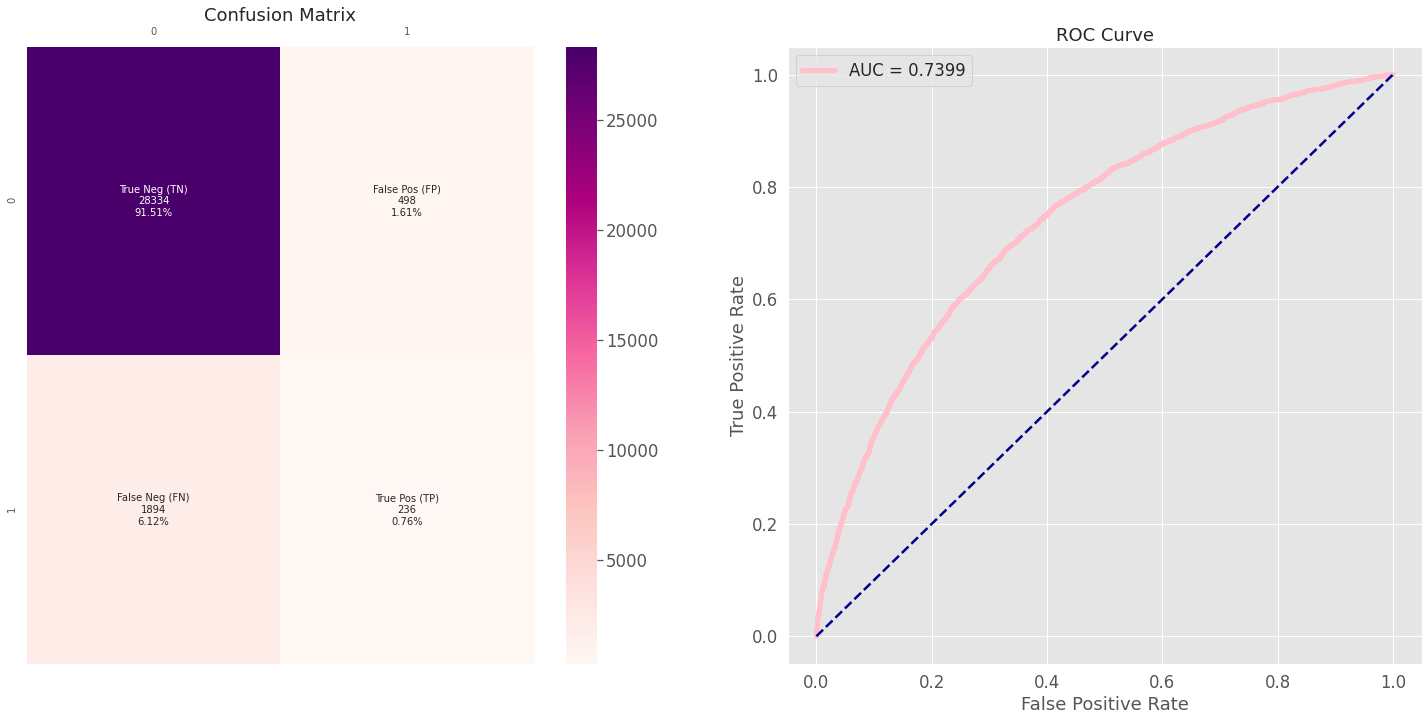

True negative =  28334
False positive =  498
False negative =  1894
True positive =  236
time: 899 ms (started: 2021-08-03 09:29:47 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6324110821047548

time: 5.98 ms (started: 2021-08-03 09:29:48 +00:00)


In [ ]:
comparison_RandomOverSampler = comparison_RandomOverSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - Random Forest",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688102,0.743489,0.672770,0.228859,1433,0.137881,697,0.682619,0.025469
1,RandomOverSampler - Random Forest,0.922744,0.739877,0.110798,0.164804,236,0.321526,1894,0.632411,9.926873


time: 21.4 ms (started: 2021-08-03 09:29:48 +00:00)


### <font color='grey'>XGBoost</font>

In [ ]:
best_params = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

time: 2.51 ms (started: 2021-08-03 09:29:48 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_oversampled, y_train_oversampled, X_test, y_test, "RandomOverSampler - XGBoost", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.002493
1          399406              0.004104
2          168652              0.014101
3          317387              0.003971
4          371921              0.026684
...           ...                   ...
30957      268716              0.002390
30958      398091              0.003213
30959      228535              0.002589
30960      107632              0.001065
30961      343857              0.046165

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9294296234093404 pour la méthode RandomOverSampler - XGBoost.
 
 
Le score de précision est de 0.3788546255506608 pour la méthode RandomOverSampler - XGBoost.
 
 
Le score recall est de 0.04037558685446009 pour la méthode RandomOverSampler - XGBoost.
 
 
Le score f1 est de 0.07297411964361476 pour la méthode RandomOverSampler - XGBoost.
 
 
Le score AUC est de 0.7394056812201363 pour la méthode RandomOverSampler - XGB

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28691 (TN),141 (FP)
Real Positive (1),2044 (FN),86 (TP)


time: 16.9 ms (started: 2021-08-03 09:47:02 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7394
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.38      0.04      0.07      2130

    accuracy                           0.93     30962
   macro avg       0.66      0.52      0.52     30962
weighted avg       0.90      0.93      0.90     30962

time: 79.2 ms (started: 2021-08-03 09:47:02 +00:00)


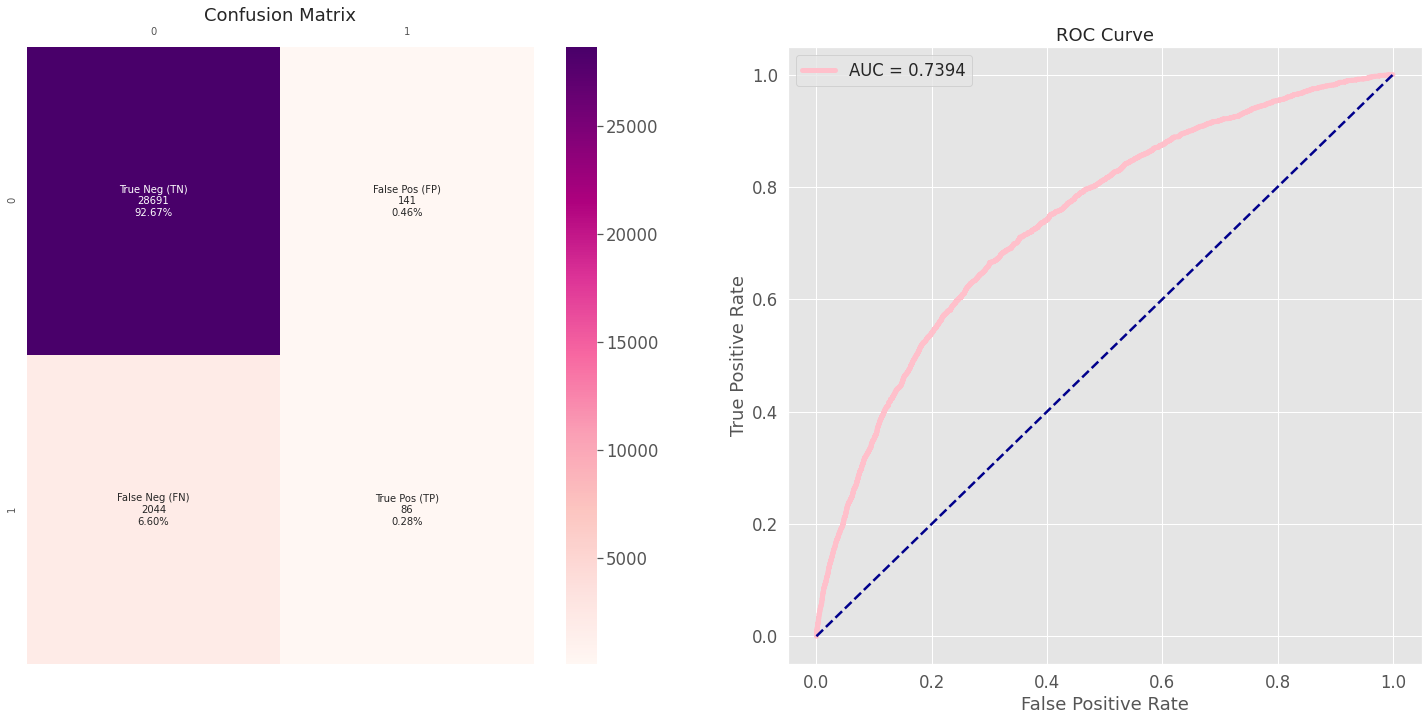

True negative =  28691
False positive =  141
False negative =  2044
True positive =  86
time: 936 ms (started: 2021-08-03 09:47:02 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6115246193544492

time: 3.71 ms (started: 2021-08-03 09:47:03 +00:00)


In [ ]:
comparison_RandomOverSampler = comparison_RandomOverSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - XGBoost",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[2],
    )
)

comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688102,0.743489,0.672770,0.228859,1433,0.137881,697,0.682619,0.025469
1,RandomOverSampler - Random Forest,0.922744,0.739877,0.110798,0.164804,236,0.321526,1894,0.632411,9.926873
2,RandomOverSampler - XGBoost,0.929430,0.739406,0.040376,0.072974,86,0.378855,2044,0.611525,1.035269


time: 25.2 ms (started: 2021-08-03 09:47:03 +00:00)


### <font color='grey'>LGBMClassifier</font>

In [ ]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 2.99 ms (started: 2021-08-03 09:47:03 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_oversampled, y_train_oversampled, X_test, y_test, "RandomOverSampler - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.273859
1          399406              0.318758
2          168652              0.478873
3          317387              0.228069
4          371921              0.712119
...           ...                   ...
30957      268716              0.324483
30958      398091              0.308229
30959      228535              0.233845
30960      107632              0.295092
30961      343857              0.520643

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.7442994638589239 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score de précision est de 0.15826148576827684 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score recall est de 0.6291079812206573 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score f1 est de 0.2529017646503728 pour la méthode RandomOverSampler - LGBMClassifier.
 
 
Le score AUC est de 0.7590119448656423 pour la méth

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),21705 (TN),7127 (FP)
Real Positive (1),790 (FN),1340 (TP)


time: 22.1 ms (started: 2021-08-03 09:48:38 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7590
              precision    recall  f1-score   support

         0.0       0.96      0.75      0.85     28832
         1.0       0.16      0.63      0.25      2130

    accuracy                           0.74     30962
   macro avg       0.56      0.69      0.55     30962
weighted avg       0.91      0.74      0.80     30962

time: 90 ms (started: 2021-08-03 09:48:38 +00:00)


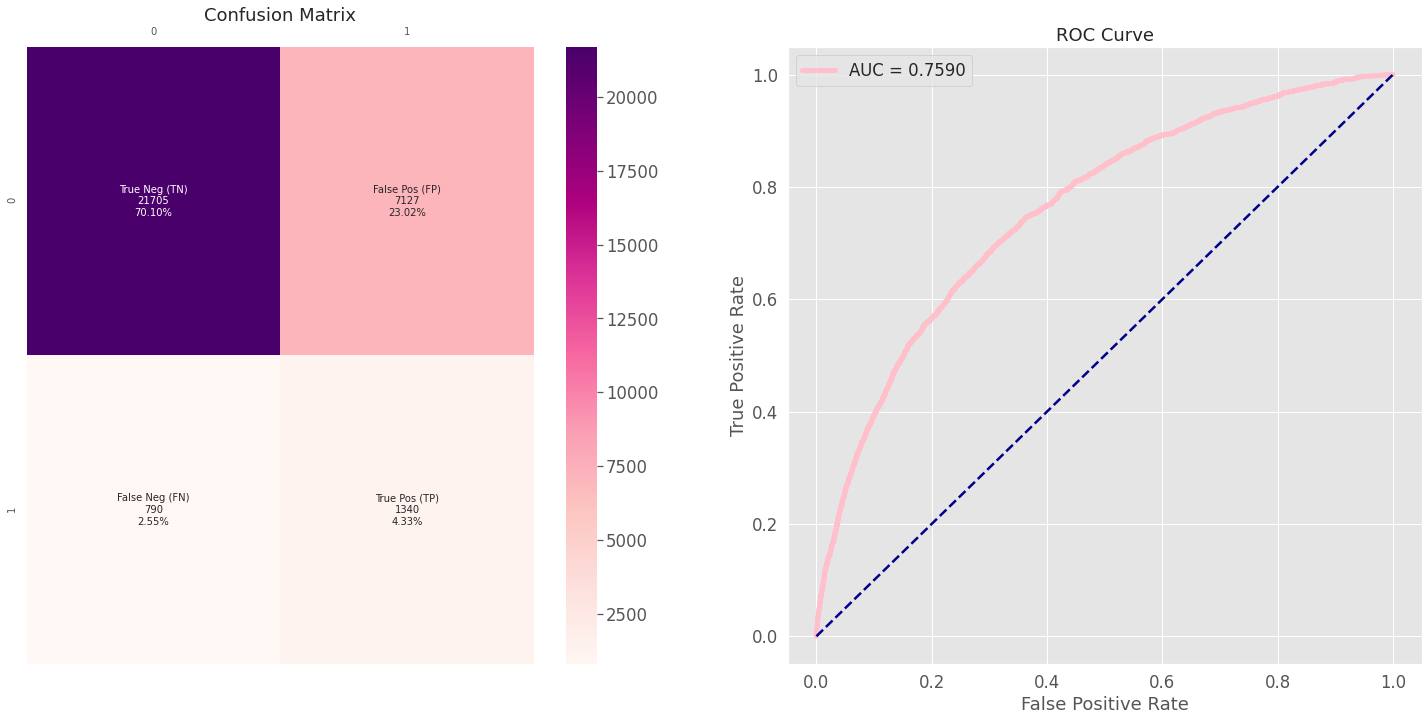

True negative =  21705
False positive =  7127
False negative =  790
True positive =  1340
time: 928 ms (started: 2021-08-03 09:48:38 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.7031096742066426

time: 4.75 ms (started: 2021-08-03 09:48:39 +00:00)


In [ ]:
comparison_RandomOverSampler = comparison_RandomOverSampler.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[3],
    )
)

comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688102,0.743489,0.672770,0.228859,1433,0.137881,697,0.682619,0.025469
1,RandomOverSampler - Random Forest,0.922744,0.739877,0.110798,0.164804,236,0.321526,1894,0.632411,9.926873
2,RandomOverSampler - XGBoost,0.929430,0.739406,0.040376,0.072974,86,0.378855,2044,0.611525,1.035269
3,RandomOverSampler - LGBMClassifier,0.744299,0.759012,0.629108,0.252902,1340,0.158261,790,0.703110,1.275609


time: 23.1 ms (started: 2021-08-03 09:48:39 +00:00)


## <font color='blue'>Oversampling (SMOTE)</font>

C'est une méthode qui va créer de nouvelles données de la classe sous-représentée à partir des données existantes (et donc de la variété) pour que chaque classe ait le même nombre de données que la classe sur-représentée à l'origine.

### <font color='grey'>Mise en place</font>

In [ ]:
from imblearn.over_sampling import SMOTE

time: 1.33 ms (started: 2021-08-03 09:48:39 +00:00)


In [ ]:
print("Label 1, Before using SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Before using SMOTE: {} ".format(sum(y_train==0)))

Label 1, Before using SMOTE: 8654 
Label 0, Before using SMOTE: 115191 
time: 32.5 ms (started: 2021-08-03 09:48:39 +00:00)


In [ ]:
sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

time: 42 s (started: 2021-08-03 09:48:39 +00:00)


In [ ]:
print("Label 1, After using SMOTE: {}".format(sum(y_train_resampled==1)))
print("Label 0, After using SMOTE: {}".format(sum(y_train_resampled==0)))

Label 1, After using SMOTE: 115191
Label 0, After using SMOTE: 115191
time: 1.05 s (started: 2021-08-03 09:49:21 +00:00)


### <font color='grey'>Régression logistique</font>

In [ ]:
best_params = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)

time: 3.97 ms (started: 2021-08-03 09:49:22 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_resampled, y_train_resampled, X_test, y_test, "SMOTE - Regression logistique", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.286410
1          399406              0.248669
2          168652              0.579176
3          317387              0.154595
4          371921              0.716784
...           ...                   ...
30957      268716              0.294097
30958      398091              0.145174
30959      228535              0.330543
30960      107632              0.420393
30961      343857              0.630195

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.6899748078289516 pour la méthode SMOTE - Regression logistique.
 
 
Le score de précision est de 0.13462479209470699 pour la méthode SMOTE - Regression logistique.
 
 
Le score recall est de 0.6460093896713615 pour la méthode SMOTE - Regression logistique.
 
 
Le score f1 est de 0.22281596631851672 pour la méthode SMOTE - Regression logistique.
 
 
Le score AUC est de 0.7329634554459574 pour la méthode SMOTE - Regress

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19987 (TN),8845 (FP)
Real Positive (1),754 (FN),1376 (TP)


time: 18 ms (started: 2021-08-03 09:49:31 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7330
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.81     28832
         1.0       0.13      0.65      0.22      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.67      0.51     30962
weighted avg       0.91      0.69      0.77     30962

time: 90.9 ms (started: 2021-08-03 09:49:31 +00:00)


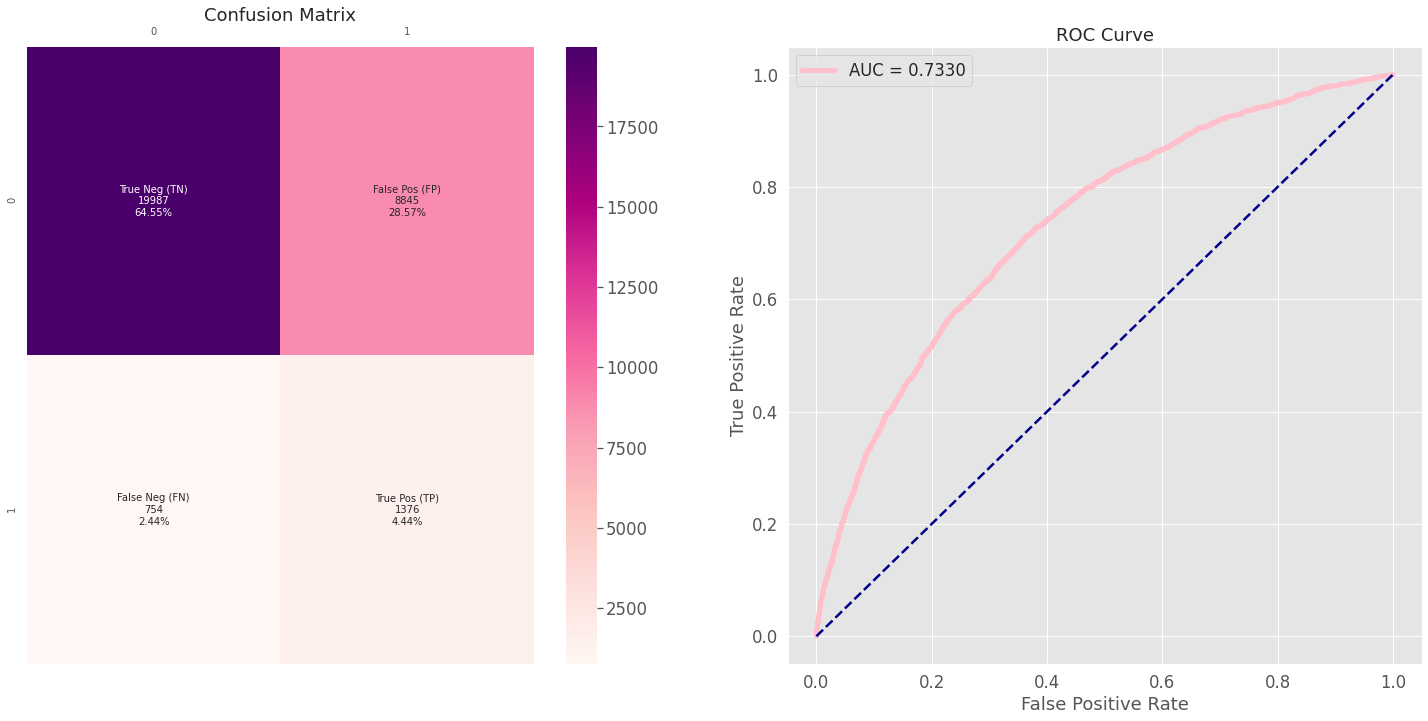

True negative =  19987
False positive =  8845
False negative =  754
True positive =  1376
time: 812 ms (started: 2021-08-03 09:49:31 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6742537989105012

time: 6.11 ms (started: 2021-08-03 09:49:32 +00:00)


In [ ]:
comparison_smote = pd.DataFrame({})

comparison_smote = comparison_smote.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - Regression Logistique",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[0],
    )
)

comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.689975,0.732963,0.646009,0.222816,1376,0.134625,754,0.674254,0.024378


time: 19.8 ms (started: 2021-08-03 09:49:32 +00:00)


### <font color='grey'>Random Forest</font>

In [ ]:
best_params = RandomForestClassifier(n_estimators=900, criterion='gini', max_depth=25, min_samples_split=8, min_samples_leaf=11, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                     oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

time: 2.18 ms (started: 2021-08-03 09:49:32 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_resampled, y_train_resampled, X_test, y_test, "SMOTE - Random Forest", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.103621
1          399406              0.141900
2          168652              0.177749
3          317387              0.075848
4          371921              0.201142
...           ...                   ...
30957      268716              0.116236
30958      398091              0.172084
30959      228535              0.090954
30960      107632              0.210644
30961      343857              0.240433

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9311091014792326 pour la méthode SMOTE - Random Forest.
 
 
Le score de précision est de 0.2857142857142857 pour la méthode SMOTE - Random Forest.
 
 
Le score recall est de 0.0009389671361502347 pour la méthode SMOTE - Random Forest.
 
 
Le score f1 est de 0.0018717828731867104 pour la méthode SMOTE - Random Forest.
 
 
Le score AUC est de 0.7086623886865403 pour la méthode SMOTE - Random Forest.
 
 
time: 22min 35s 

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28827 (TN),5 (FP)
Real Positive (1),2128 (FN),2 (TP)


time: 17.5 ms (started: 2021-08-03 10:12:07 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7087
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.29      0.00      0.00      2130

    accuracy                           0.93     30962
   macro avg       0.61      0.50      0.48     30962
weighted avg       0.89      0.93      0.90     30962

time: 77.3 ms (started: 2021-08-03 10:12:07 +00:00)


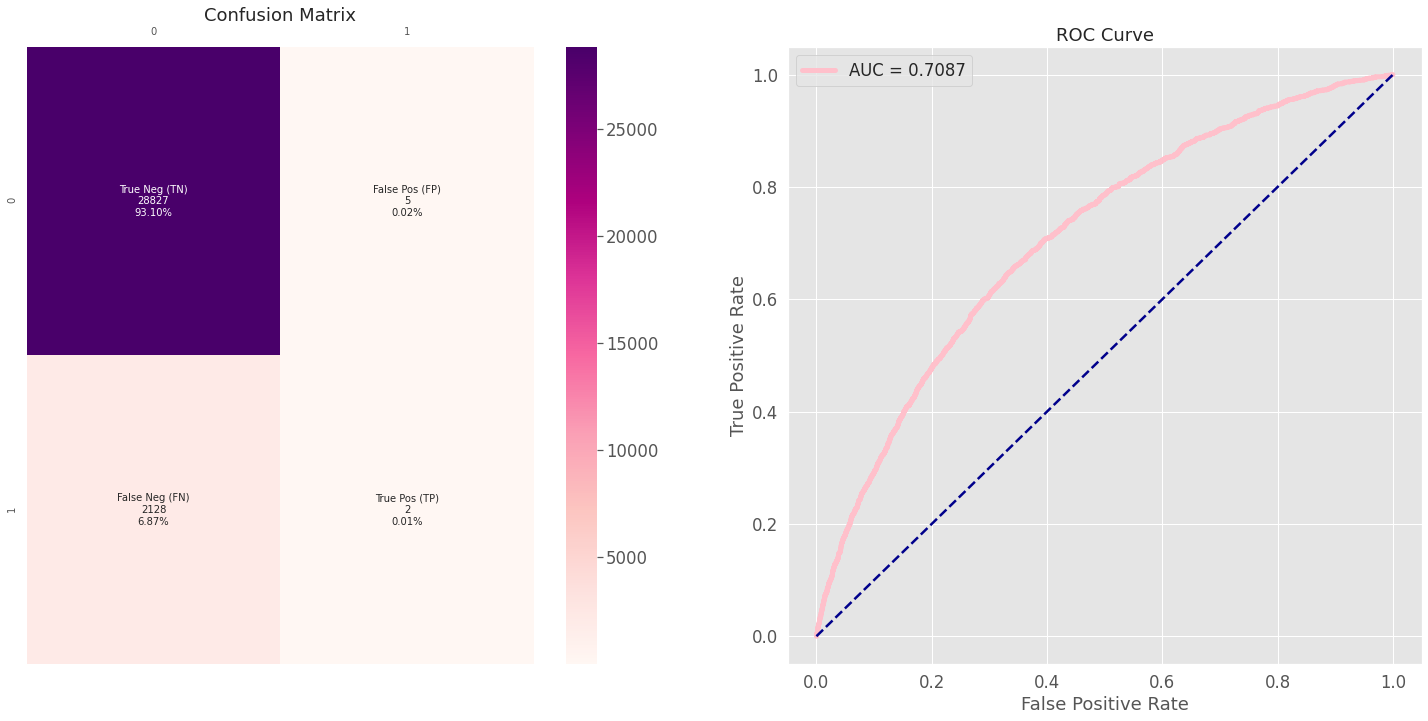

True negative =  28827
False positive =  5
False negative =  2128
True positive =  2
time: 911 ms (started: 2021-08-03 10:12:07 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.5985019390665318

time: 6.49 ms (started: 2021-08-03 10:12:08 +00:00)


In [ ]:
comparison_smote = comparison_smote.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - Random Forest",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[1],
    )
)

comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.689975,0.732963,0.646009,0.222816,1376,0.134625,754,0.674254,0.024378
1,SMOTE - Random Forest,0.931109,0.708662,0.000939,0.001872,2,0.285714,2128,0.598502,10.584213


time: 23.8 ms (started: 2021-08-03 10:12:08 +00:00)


### <font color='grey'>XGBoost</font>

In [ ]:
best_params = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

time: 2.72 ms (started: 2021-08-03 10:12:08 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_resampled, y_train_resampled, X_test, y_test, "SMOTE - XGBoost", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.003879
1          399406              0.003077
2          168652              0.014838
3          317387              0.008489
4          371921              0.025771
...           ...                   ...
30957      268716              0.001563
30958      398091              0.002268
30959      228535              0.000524
30960      107632              0.003942
30961      343857              0.037187

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9312059944448033 pour la méthode SMOTE - XGBoost.
 
 
Le score de précision est de 0.5 pour la méthode SMOTE - XGBoost.
 
 
Le score recall est de 0.009389671361502348 pour la méthode SMOTE - XGBoost.
 
 
Le score f1 est de 0.018433179723502304 pour la méthode SMOTE - XGBoost.
 
 
Le score AUC est de 0.7438888405814092 pour la méthode SMOTE - XGBoost.
 
 
time: 18min 56s (started: 2021-08-03 10:12:08 +00:00)


In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28812 (TN),20 (FP)
Real Positive (1),2110 (FN),20 (TP)


time: 14.9 ms (started: 2021-08-03 10:31:04 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7439
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.50      0.01      0.02      2130

    accuracy                           0.93     30962
   macro avg       0.72      0.50      0.49     30962
weighted avg       0.90      0.93      0.90     30962

time: 79.1 ms (started: 2021-08-03 10:31:04 +00:00)


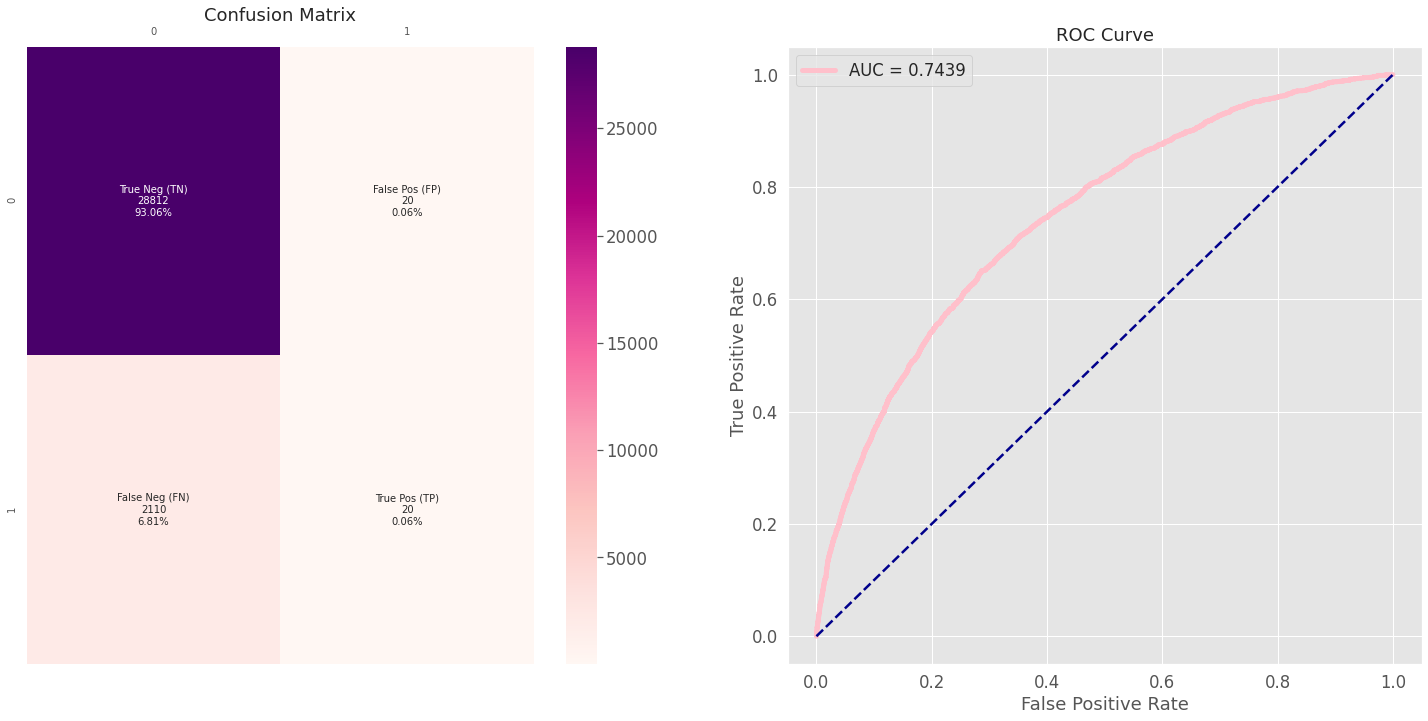

True negative =  28812
False positive =  20
False negative =  2110
True positive =  20
time: 921 ms (started: 2021-08-03 10:31:04 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6015859602529086

time: 3.98 ms (started: 2021-08-03 10:31:05 +00:00)


In [ ]:
comparison_smote = comparison_smote.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - XGBoost",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[2],
    )
)

comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.689975,0.732963,0.646009,0.222816,1376,0.134625,754,0.674254,0.024378
1,SMOTE - Random Forest,0.931109,0.708662,0.000939,0.001872,2,0.285714,2128,0.598502,10.584213
2,SMOTE - XGBoost,0.931206,0.743889,0.009390,0.018433,20,0.500000,2110,0.601586,1.041540


time: 21.6 ms (started: 2021-08-03 10:31:05 +00:00)


### <font color='grey'>LGBMClassifier</font>

In [ ]:
best_params = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 3.19 ms (started: 2021-08-03 10:31:05 +00:00)


In [ ]:
model, accuracy, precision, recall, f1, AUC, prediction, probability, execution_time, prediction_time, resume_prediction_class, probability_positive_class= classification(best_params, X_train_resampled, y_train_resampled, X_test, y_test, "SMOTE - LGBMClassifier", file_name=None)

Exécution 
 
       SK_ID_CURR  positive_probability
0          316145              0.054166
1          399406              0.054961
2          168652              0.063138
3          317387              0.028198
4          371921              0.177795
...           ...                   ...
30957      268716              0.057272
30958      398091              0.034727
30959      228535              0.034825
30960      107632              0.052829
30961      343857              0.104700

[30962 rows x 2 columns]
Qualité de la classification 
 
 
L'accuracy score est de 0.9314966733415154 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score de précision est de 0.5737704918032787 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score recall est de 0.01643192488262911 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score f1 est de 0.031948881789137386 pour la méthode SMOTE - LGBMClassifier.
 
 
Le score AUC est de 0.7540881642984062 pour la méthode SMOTE - LGBMClassifier.
 
 
time: 2min 39s

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),28806 (TN),26 (FP)
Real Positive (1),2095 (FN),35 (TP)


time: 18.2 ms (started: 2021-08-03 10:33:45 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability[:,1])  #on se base sur la probabilité d'être en défaut de paiement
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7541
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28832
         1.0       0.57      0.02      0.03      2130

    accuracy                           0.93     30962
   macro avg       0.75      0.51      0.50     30962
weighted avg       0.91      0.93      0.90     30962

time: 81.2 ms (started: 2021-08-03 10:33:45 +00:00)


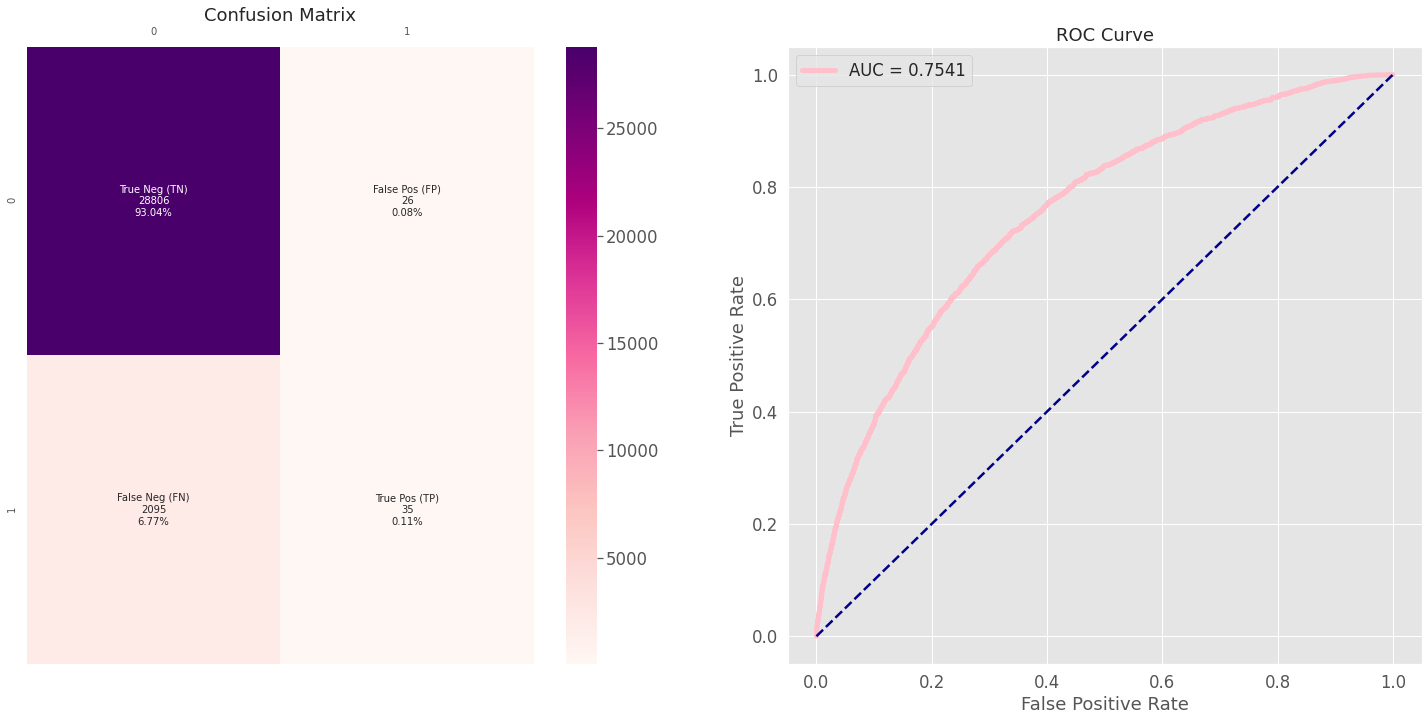

True negative =  28806
False positive =  26
False negative =  2095
True positive =  35
time: 941 ms (started: 2021-08-03 10:33:45 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6042908448897675

time: 7.3 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_smote = comparison_smote.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - LGBMClassifier",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
         "time": prediction_time
        },
        index=[3],
    )
)

comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.689975,0.732963,0.646009,0.222816,1376,0.134625,754,0.674254,0.024378
1,SMOTE - Random Forest,0.931109,0.708662,0.000939,0.001872,2,0.285714,2128,0.598502,10.584213
2,SMOTE - XGBoost,0.931206,0.743889,0.009390,0.018433,20,0.500000,2110,0.601586,1.041540
3,SMOTE - LGBMClassifier,0.931497,0.754088,0.016432,0.031949,35,0.573770,2095,0.604291,1.475769


time: 22.3 ms (started: 2021-08-03 10:33:46 +00:00)


# <font color='green'>Comparaison modèles </font>

## <font color='violet'>Baseline</font>

In [ ]:
comparison_baseline

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931367,0.743774,0.008451,0.016659,18,0.580645,2112,0.601354,0.026990
1,Baseline - Random Forest,0.931206,0.739290,0.000000,0.000000,0,0.000000,2130,0.598228,9.093134
2,Baseline - XGBoost,0.931432,0.742908,0.013615,0.026593,29,0.568627,2101,0.603242,1.080430
3,Baseline - LGBMClassifier,0.931206,0.761480,0.009390,0.018433,20,0.500000,2110,0.601586,1.161368


time: 14.5 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_baseline.to_csv("comparison_baseline.csv", index=False)

time: 24 ms (started: 2021-08-03 10:33:46 +00:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier en Baseline.

Le Recall pour la class 1 est maximisé avec l'algorithme XGBoost en Baseline,on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme XGBoost en Baseline.

Le F1_score est maximisé avec l'algorithme XGBoost en Baseline.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme XGBoost en Baseline.

La métrique personnelle créée permet de dire que c'est avec l'algorithme XGBoost en Baseline que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

En Baseline le modèle optimal choisi est XGBoost

## <font color='violet'>Class_weight</font>

In [ ]:
comparison_class_weight

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Class Weight - Regression Logistique,0.687972,0.743817,0.670892,0.228293,1429,0.137549,701,0.681865,0.024788
1,Class Weight - Random Forest,0.922066,0.740505,0.112207,0.165341,239,0.314060,1891,0.632479,8.685499
2,Class Weight - XGBoost,0.931400,0.746316,0.003286,0.006548,7,0.875000,2123,0.599528,0.507073
3,Class Weight - LGBMClassifier,0.741167,0.760122,0.632394,0.251588,1347,0.157030,783,0.702272,1.237642


time: 13.8 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_class_weight.to_csv("comparison_class_weight.csv", index=False)

time: 140 ms (started: 2021-08-03 10:33:46 +00:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme Régression logistique et LGBMClassifier, on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme Régression logistique et LGBMClassifier.

Le F1_score est maximisé avec l'algorithme LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme de Régression logistique et LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Avec la méthode Class_weight='balanced'et si on se base sur la métrique d'optimisation des coûts, il s'agit de l'algorithme LGBMClassifier qui maximise les gains.

## <font color='violet'>Undersampling</font>

In [ ]:
comparison_RandomUnderSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomUnderSampler - Regression Logistique,0.678703,0.740488,0.668075,0.222448,1423,0.133440,707,0.674903,0.027993
1,RandomUnderSampler - Random Forest,0.682223,0.734358,0.667136,0.224115,1421,0.134679,709,0.676829,6.827241
2,RandomUnderSampler - XGBoost,0.680802,0.742569,0.678873,0.226380,1446,0.135838,684,0.680112,0.604397
3,RandomUnderSampler - LGBMClassifier,0.689426,0.754453,0.683099,0.232317,1455,0.139958,675,0.687163,1.307599


time: 13.1 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_RandomUnderSampler.to_csv("comparison_RandomUnderSampler.csv", index=False)

time: 8.24 ms (started: 2021-08-03 10:33:46 +00:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme LGBMClassifier,on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme LGBMClassifier.

Le F1_score est maximisé avec l'algorithme LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Ici, avec la méthode de undersampler, il est clair qu'il s'agit de l'algorithme LGBMClassifier qui est optimal pour notre problème.

## <font color='violet'>Oversampling</font>

In [ ]:
comparison_RandomOverSampler

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,RandomOverSampler - Regression Logistique,0.688102,0.743489,0.672770,0.228859,1433,0.137881,697,0.682619,0.025469
1,RandomOverSampler - Random Forest,0.922744,0.739877,0.110798,0.164804,236,0.321526,1894,0.632411,9.926873
2,RandomOverSampler - XGBoost,0.929430,0.739406,0.040376,0.072974,86,0.378855,2044,0.611525,1.035269
3,RandomOverSampler - LGBMClassifier,0.744299,0.759012,0.629108,0.252902,1340,0.158261,790,0.703110,1.275609


time: 11.6 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_RandomOverSampler.to_csv("comparison_RandomOverSampler.csv", index=False)

time: 8.95 ms (started: 2021-08-03 10:33:46 +00:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme Régression logistique et LGBMClassifier, on rate donc le moins de TP avec ces algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme Régression logistique et LGBMClassifier.

Le F1_score est maximisé avec l'algorithme LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme Régression logistique et LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Avec la méthode oversampler, et si on se base sur la métrique d'optimisation des coups, il s'agit de l'algorithme LGBMClassifier qui maximise les gains.

## <font color='violet'>Oversampling (SMOTE)</font>

In [ ]:
comparison_smote

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,SMOTE - Regression Logistique,0.689975,0.732963,0.646009,0.222816,1376,0.134625,754,0.674254,0.024378
1,SMOTE - Random Forest,0.931109,0.708662,0.000939,0.001872,2,0.285714,2128,0.598502,10.584213
2,SMOTE - XGBoost,0.931206,0.743889,0.009390,0.018433,20,0.500000,2110,0.601586,1.041540
3,SMOTE - LGBMClassifier,0.931497,0.754088,0.016432,0.031949,35,0.573770,2095,0.604291,1.475769


time: 14 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_smote.to_csv("comparison_smote.csv", index=False)

time: 9.05 ms (started: 2021-08-03 10:33:46 +00:00)


L'AUC est maximisé avec l'algorithme LGBMClassifier.

Le Recall est maximisé avec l'algorithme Régression logistique, on rate donc le moins de TP avec cet algorithme.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme Régression logistique.

Le F1_score est maximisé avec la régression logistique.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme Régression logistique.

La métrique personnelle créée permet de dire que c'est avec l'algorithme de Régression logistique que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Avec la méthode SMOTE, on peut dire que l'algorithme optimal est l'algorithme Regression logistique mais avec une faible accuracy. 

Je peux donc dire que l'algorithme optimal après avoir utilisé SMOTE est LGBMClassifier.

## <font color='violet'>Best of the Best</font>

In [ ]:
frames = [comparison_baseline, comparison_class_weight, comparison_RandomUnderSampler, comparison_RandomOverSampler, comparison_smote]
result = pd.concat(frames)
result

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - Regression Logistique,0.931367,0.743774,0.008451,0.016659,18,0.580645,2112,0.601354,0.026990
1,Baseline - Random Forest,0.931206,0.739290,0.000000,0.000000,0,0.000000,2130,0.598228,9.093134
2,Baseline - XGBoost,0.931432,0.742908,0.013615,0.026593,29,0.568627,2101,0.603242,1.080430
3,Baseline - LGBMClassifier,0.931206,0.761480,0.009390,0.018433,20,0.500000,2110,0.601586,1.161368
0,Class Weight - Regression Logistique,0.687972,0.743817,0.670892,0.228293,1429,0.137549,701,0.681865,0.024788
1,Class Weight - Random Forest,0.922066,0.740505,0.112207,0.165341,239,0.314060,1891,0.632479,8.685499
2,Class Weight - XGBoost,0.931400,0.746316,0.003286,0.006548,7,0.875000,2123,0.599528,0.507073
3,Class Weight - LGBMClassifier,0.741167,0.760122,0.632394,0.251588,1347,0.157030,783,0.702272,1.237642
0,RandomUnderSampler - Regression Logistique,0.678703,0.740488,0.668075,0.222448,1423,0.133440,707,0.674903,0.027993
1,RandomUnderSampler - Random Forest,0.682223,0.734358,0.667136,0.224115,1421,0.134679,709,0.676829,6.827241


time: 24.6 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
result.to_csv("all_comparison_method.csv", index=False)

time: 9.91 ms (started: 2021-08-03 10:33:46 +00:00)


In [ ]:
comparison_finale = pd.DataFrame({})

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "Baseline - XGBoost",
         "Accuracy": 0.931432,
         "AUC": 0.742908,
         "Recall class 1":0.013615,
         "F1":0.026593,   
         "TP":29,
         "Precision":0.568627,
         "FN":2101,
         "score Gain":0.603242,
         "time": 1.080430
        },
        index=[0],
    )
)						

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "Class Weight - LGBMClassifier",
         "Accuracy": 0.741167,
         "AUC": 0.760122,
         "Recall class 1":0.632394,
         "F1":0.251588,   
         "TP":1347,
         "Precision":0.157030,
         "FN":783,
         "score Gain":0.702272,
         "time": 1.237642
        },
        index=[1],
    )
)	


comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "RandomUnderSampler - LGBMClassifier",
         "Accuracy": 0.689426,
         "AUC": 0.754453,
         "Recall class 1": 0.683099,
         "F1": 0.232317,   
         "TP": 1455,
         "Precision": 0.139958,
         "FN": 675,
         "score Gain": 0.687163,
         "time": 1.307599
        },
        index=[2],
    )
)

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "RandomOverSampler - LGBMClassifier",
         "Accuracy": 0.744299,
         "AUC": 0.759012,
         "Recall class 1": 0.629108,
         "F1": 0.252902,   
         "TP": 1340,
         "Precision": 0.158261,
         "FN": 790,
         "score Gain": 0.703110,
         "time": 1.275609
        },
        index=[3],
    )
)

comparison_finale = comparison_finale.append(
    pd.DataFrame(
        {
         "Modele": "SMOTE - LGBMClassifier",
         "Accuracy": 0.931497,
         "AUC": 0.754088,
         "Recall class 1": 0.016432,
         "F1": 0.031949,   
         "TP": 35,
         "Precision": 0.573770,
         "FN": 2095,
         "score Gain": 0.604291,
         "time": 1.475769
        },
        index=[4],
    )
)

time: 40.8 ms (started: 2021-08-03 12:16:13 +00:00)


In [ ]:
comparison_finale

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain,time
0,Baseline - XGBoost,0.931432,0.742908,0.013615,0.026593,29,0.568627,2101,0.603242,1.080430
1,Class Weight - LGBMClassifier,0.741167,0.760122,0.632394,0.251588,1347,0.157030,783,0.702272,1.237642
2,RandomUnderSampler - LGBMClassifier,0.689426,0.754453,0.683099,0.232317,1455,0.139958,675,0.687163,1.307599
3,RandomOverSampler - LGBMClassifier,0.744299,0.759012,0.629108,0.252902,1340,0.158261,790,0.703110,1.275609
4,SMOTE - LGBMClassifier,0.931497,0.754088,0.016432,0.031949,35,0.573770,2095,0.604291,1.475769


time: 14.5 ms (started: 2021-08-03 12:16:19 +00:00)


In [ ]:
comparison_finale.to_csv("comparison_finale.csv", index=False)

time: 9.42 ms (started: 2021-08-03 12:16:22 +00:00)


L'AUC est maximisé avec l'algorithme Class Weight - LGBMClassifier.

Le Recall est maximisé avec l'algorithme RandomUnderSampler - LGBMClassifier.

Le F1_score est maximisé avec l'algorithme RandomOverSampler - LGBMClassifier.

Le nombre de TP (LE PRET N'EST PAS ACCORDE ET LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est maximisé avec l'algorithme RandomUnderSampler - LGBMClassifier.

Le nombre de FN ( LE PRET EST ACCORDE MAIS LE CLIENT NE PEUT PAS REMBOURSER LE PRET) est minimisé avec l'algorithme RandomUnderSampler - LGBMClassifier.

La métrique personnelle créée permet de dire que c'est avec l'algorithme RandomOverSampler - LGBMClassifier que la Banque peut maximiser ses gains lors de l'acceptation d'un prêt.

Au vue des comparaisons précédentes, RandomUnderSampler - LGBMClassifier et RandomOverSampler - LGBMClassifier sont les modèles optimums pour notre problème mais je décide de garder pour la suite l'RandomUnderSampler - LGBMClassifier qui a le meilleur recall ce qui évitera d'accorder des prêts à des personnes qui ne peuvent pas rembourser(le but est d'avoir un recall important pour la prédiction des 1) tout en ayant un gain d'argent important pour la banque (score gain important).

# <font color='green'>Analyse avec le meilleur modèle retenu</font>

## <font color='blue'>Exécution au seuil 0,50 (de base dans sklearn)</font>

In [ ]:
print("Label 1, Before using RandomUnderSampler: {} ".format(sum(y_train==1)))
print("Label 0, Before using RandomUnderSampler: {} ".format(sum(y_train==0)))

Label 1, Before using RandomUnderSampler: 8654 
Label 0, Before using RandomUnderSampler: 115191 
time: 38.1 ms (started: 2021-08-09 13:31:13 +00:00)


In [ ]:
rus = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = rus.fit_sample(X_train, y_train)
X_train_undersampled = pd.DataFrame(X_train_undersampled, columns=X_train.columns)

time: 209 ms (started: 2021-08-09 13:31:14 +00:00)


In [ ]:
print("Label 1, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==1)))
print("Label 0, After using RandomUnderSampler: {}".format(sum(y_train_undersampled==0)))

Label 1, After using RandomUnderSampler: 8654
Label 0, After using RandomUnderSampler: 8654
time: 88.9 ms (started: 2021-08-09 13:31:14 +00:00)


In [ ]:
best_model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=- 1,
                             learning_rate=0.01, n_estimators=1400, subsample_for_bin=200000, objective='binary',
                             class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0,
                             subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=- 1,
                             silent=True, importance_type='split')

time: 2.37 ms (started: 2021-08-09 13:31:14 +00:00)


In [ ]:
model_fitted = best_model.fit(X_train_undersampled, y_train_undersampled)

time: 13 s (started: 2021-08-09 13:31:14 +00:00)


In [ ]:
import pickle
pickle.dump(model_fitted, open('best_final_prediction.pickle', 'wb'))

time: 150 ms (started: 2021-08-09 13:31:27 +00:00)


In [ ]:
probability = best_model.predict_proba(X_test)
probability_default_payment = probability[:, 1]
probability_default_payment

array([0.28910082, 0.31146097, 0.48516842, ..., 0.31089649, 0.39112507,
       0.36333112])

time: 1.31 s (started: 2021-08-09 13:31:27 +00:00)


In [ ]:
prediction = best_model.predict(X_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

time: 1.29 s (started: 2021-08-09 13:31:29 +00:00)


In [ ]:
predictive_class_50 = pd.DataFrame({'SK_ID_CURR': X_test.index, 'probability_default_payment': prediction})

time: 2.86 ms (started: 2021-08-09 13:31:30 +00:00)


In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(colored('L\'accuracy score est de {} .\n \n '.format(
        accuracy), 'blue'))

L'accuracy score est de 0.6894257476907176 .
 
 
time: 9.53 ms (started: 2021-08-09 13:31:30 +00:00)


Le modèle a une accuracy de 69% ce qui nous permet de dire que 69% des individus sont bien classés avec ce modèle et que le modèle a une bonne justesse de prédiction.

In [ ]:
precision = precision_score(y_test, prediction, average='binary')
print(colored('Le score de précision est de {}.\n \n '.format(
        precision), 'blue'))

Le score de précision est de 0.13995767602924203.
 
 
time: 21.7 ms (started: 2021-08-09 13:31:30 +00:00)


Le modèle a une précision de 13% ce qui montre qu'une proportion de 87% de classification positive (individus en défaut de paiement) était correcte donc il y a 13% de vrai positif pour 87% de faux positif. Moins il y a de faux positif plus la précision se rapproche de 1,0. 

In [ ]:
recall = recall_score(y_test, prediction, average='binary')
print(colored('Le score recall est de {}.\n \n '.format(
        recall), 'blue'))

Le score recall est de 0.6830985915492958.
 
 
time: 26 ms (started: 2021-08-09 13:31:30 +00:00)


Cette métrique montre la proportion de résultats positifs réels correctement identifiée. Un modèle ne produisant pas de faux négatif à un rappel de 1. 

Notre modèle a un rappel de 0,68. En d'autres termes, il identifie correctement 68 % des individus défaillants pour le paiement.



In [ ]:
f1 = f1_score(y_test, prediction, average='binary')
print(colored('Le score f1 est de {}.\n \n '.format(
        f1), 'blue'))

Le score f1 est de 0.23231678109532175.
 
 
time: 22.3 ms (started: 2021-08-09 13:31:30 +00:00)


Le score F1 est la moyenne harmonique de la précision et du recall qui est une mesure de la performance de la capacité de classification du modèle car il prend en compte le nombre de faux positifs et négatifs. Plus ce terme est grand, plus performant est le modèle. 

In [ ]:
AUC = roc_auc_score(y_test, probability_default_payment)       
print(colored('Le score AUC est de {}.\n \n '.format(
        AUC), 'blue'))

Le score AUC est de 0.7544529617587137.
 
 
time: 16.1 ms (started: 2021-08-09 13:31:30 +00:00)


L'AUC correspond à l'aire sous la courbe ROC Plus l’AUC est grande, meilleur est le modèle.

In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),19891 (TN),8941 (FP)
Real Positive (1),675 (FN),1455 (TP)


time: 19.7 ms (started: 2021-08-09 13:31:30 +00:00)


In [ ]:
X_test.shape

(30962, 210)

time: 4.67 ms (started: 2021-08-09 13:31:30 +00:00)


In [ ]:
X_train_undersampled.shape

(17308, 210)

time: 3.99 ms (started: 2021-08-09 13:31:30 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability_default_payment) 
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7545
              precision    recall  f1-score   support

         0.0       0.97      0.69      0.81     28832
         1.0       0.14      0.68      0.23      2130

    accuracy                           0.69     30962
   macro avg       0.55      0.69      0.52     30962
weighted avg       0.91      0.69      0.77     30962

time: 92.1 ms (started: 2021-08-09 13:31:30 +00:00)


Ce modèle est intéressant car pour la détection des défauts de paiement (1), le recall est de 0,68 ce qui évitera d'accorder des prêts à des personnes qui ne peuvent pas rembourser( le but est d'avoir un recall impoortant pour la prédiction des 1).

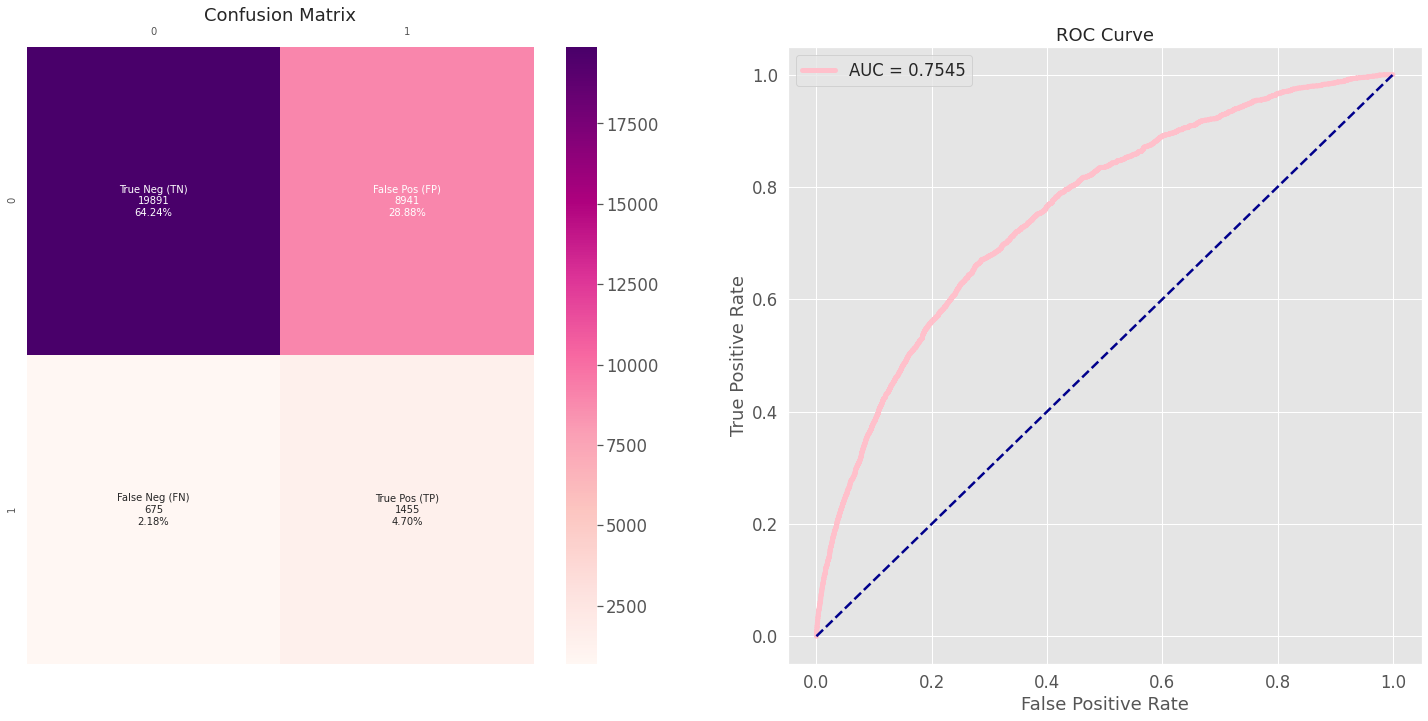

True negative =  19891
False positive =  8941
False negative =  675
True positive =  1455
time: 982 ms (started: 2021-08-09 13:31:30 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.6871633041090103

time: 7.32 ms (started: 2021-08-09 13:31:31 +00:00)


In [ ]:
comparison_thresh = pd.DataFrame({})

comparison_thresh = comparison_thresh.append(
    pd.DataFrame(
        {
         "Modele": "Avant de déterminer le seuil optimal (0,50)",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain,
        },
        index=[0],
    )
)
comparison_thresh

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain
0,"Avant de déterminer le seuil optimal (0,50)",0.689426,0.754453,0.683099,0.232317,1455,0.139958,675,0.687163


time: 20.4 ms (started: 2021-08-09 13:31:31 +00:00)


## <font color='blue'>Ordre de grandeur optimal pour les coefficients de la fonction coût ?</font>

Des coefficients arbitraires ont précédemment été définis mais ceux-ci ne sont peut-être pas optimums. Le coefficient de FN est celui qui a la plus grande importance dans notre métrique mais le coefficient a-t-il le bon ordre de grandeur. Pour vérifier cela, le score gain a été recalculé avec le modèle optimal pour différents seuils de probabilité en variant l'ordre de grandeur du coefficient FN

In [ ]:
int_seuil = np.arange(0.0, 1.01, 0.01)

coeff_fn = [-1000, -100, -10]

scor_int_1000 = []
scor_int_100 = []
scor_int_10 = []

scor_int = [scor_int_1000,scor_int_100,scor_int_10]


for idx, lis in enumerate(scor_int):
    for s in int_seuil:
      # Score du modèle : 0 à 1
      y_seuil=[]
      for i in probability_default_payment:
        if i >= s:
          y_seuil.append(1)
        elif i < s:
          y_seuil.append(0)
        
      tn, fp, fn, tp = confusion_matrix(y_test, y_seuil, labels=[0, 1]).ravel()

      scor_int[idx].append(score_banq(tn, fp, fn, tp, 10, -1, coeff_fn[idx], 0))

time: 30.4 s (started: 2021-08-09 13:31:31 +00:00)


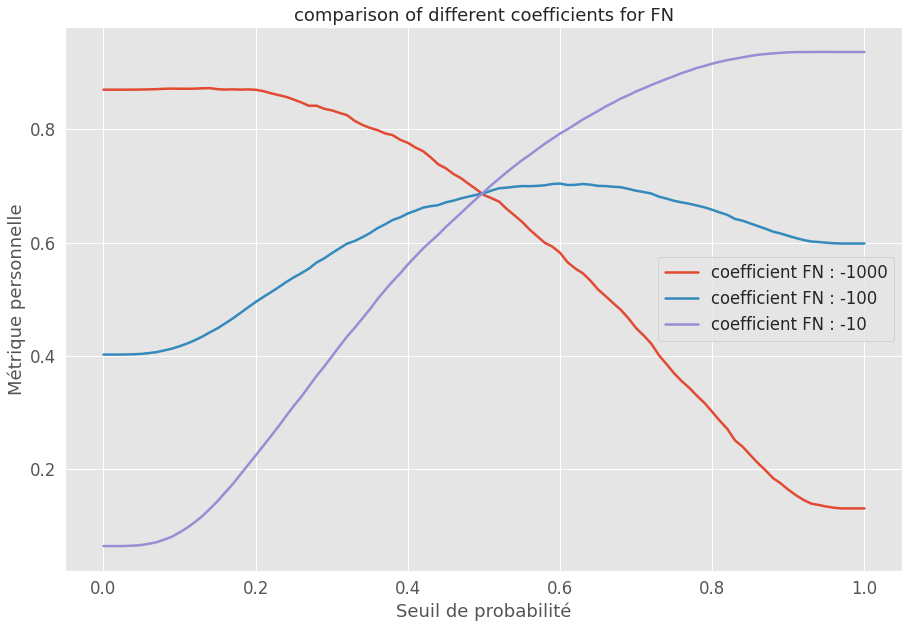

time: 378 ms (started: 2021-08-09 13:32:02 +00:00)


In [ ]:
# Affichage du gain en fonction du seuil de solvabilité    
plt.figure(figsize=(15, 10))
plt.plot(int_seuil, scor_int_1000, label = "coefficient FN : -1000")
plt.plot(int_seuil, scor_int_100, label = "coefficient FN : -100")
plt.plot(int_seuil, scor_int_10, label = "coefficient FN : -10")
plt.xlabel("Seuil de probabilité")
plt.ylabel("Métrique personnelle")
plt.title('comparison of different coefficients for FN')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Ces courbes montrent que la métrique personnelle est pertinente pour notre problématique. 
Lorque l'on donne un coefficient de -1000 pour les FN, le seuil optimal pour que la banque ait le maximum de gain d'argent se situe aux alentours d'une probabilité de 0,2 à partir de laquelle on peut voir que la courbe des gains décroit rapidement. Ce coefficient est trop strict car seules les personnes avec une probabilité de défaut de paiement < 0,2% se voient accepter leur prêt ce qui correspond à peu de personnes.


Au contraire, lorsque l'on donne un coefficient de -10 pour les FN, on peut dire que la banque est trop laxiste dans le choix des clients pour l'accord d'un prêt car le seuil optimal pour que la banque ait le maximum de gain d'argent se situe aux alentours d'une probabilité de 0,9 et toutes les personnes avec une probabilité de défaut de paiement < 0,9% se verraient accepter leur prêt ce qui correspond à peu de personnes.

Un coefficient de - 100 est mieux adapté car le seuil optimal se situerait aux alentours de 0,55 ce qui est correct pour déterminer si oui ou non le prêt est accepté. 

## <font color='blue'>Seuil optimal pour maximiser les gains de la banque</font>

La métrique personnelle gain doit être maximisée pour que la banque gagne le plus d'argent et ainsi permettre de déterminer à partir de quel seuil de probabilité un client est considéré comme solvable ou non. Généralement le seuil de probabilité choisi par les modèles pour classer les individus est de 0,5 mais au vu de la courbe du score gain, il ne s'agit pas du seuil optimal pour que la banque maximise ses gains.   

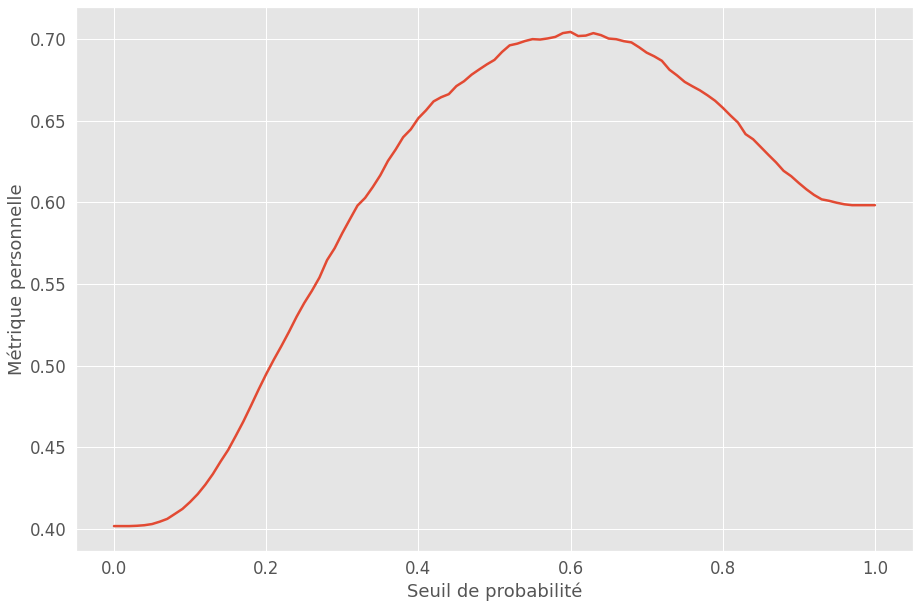

time: 10.4 s (started: 2021-08-09 13:32:02 +00:00)


In [ ]:
scor_int = []
int_seuil = np.arange(0.0, 1.01, 0.01)

for s in int_seuil:
    
  # Score du modèle : 0 à 1
  y_seuil=[]

  for i in probability_default_payment:
    if i >= s:
      y_seuil.append(1)
    elif i < s:
       y_seuil.append(0)

  tn, fp, fn, tp = confusion_matrix(y_test, y_seuil, labels=[0, 1]).ravel()
  
  scor_int.append(score_banq(tn, fp, fn, tp, 10, -1, -100, 0))
    
# Affichage du gain en fonction du seuil de solvabilité    
plt.figure(figsize=(15, 10))
plt.plot(int_seuil, scor_int)
plt.xlabel("Seuil de probabilité")
plt.ylabel("Métrique personnelle")
plt.show()

Nous pouvons voir sur ce graphique qu'il y a un pic maximum ce qui correspond au seuil optimal que devrait choisir la banque lors de l'accord ou non d'un prêt pour avoir le maximum de gain.

In [ ]:
seuil = pd.DataFrame(columns=['int_seuil','scor_int'])
seuil['int_seuil'] = int_seuil
seuil['scor_int'] = scor_int

time: 6.11 ms (started: 2021-08-09 13:32:12 +00:00)


In [ ]:
max = pd.DataFrame(seuil[seuil['scor_int'] == seuil['scor_int'].max()])
max

,int_seuil,scor_int
60,0.6,0.704298


time: 8.81 ms (started: 2021-08-09 13:32:12 +00:00)


In [ ]:
seuil = max.iloc[0]['int_seuil']

time: 1.9 ms (started: 2021-08-09 13:32:12 +00:00)


Le seuil optimal pour que la banque fasse le maximum de gain est de 0.6.

## <font color='blue'>Exécution au seuil optimal pour la banque </font>

In [ ]:
prediction = []

for i in probability_default_payment:
    if i >= seuil:
      prediction.append(1)
    elif i < seuil:
       prediction.append(0)

time: 14.8 ms (started: 2021-08-09 13:32:12 +00:00)


In [ ]:
def test_train_col_category(dataframe_train, dataframe_test, col, size, seuil):
    """This function represents the categorical variables as a pie plot.
    dataframe : dataset
    size : size of the figure (X,X)"""
    values_train = dataframe_train[col].value_counts()
    labels_train = dataframe_train[col].value_counts().index
    values_test = dataframe_test[col].value_counts()
    labels_test = dataframe_test[col].value_counts().index
    
    plt.figure(figsize=size)
    
    #pie plot
    plt.subplot(2, 2, 1)
    plt.title("Distribution of clients at threshold 0.50", fontsize=20)
    plt.pie(values_train, labels=labels_train,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    
    
    # Pie Plot
    plt.subplot(2, 2, 2)
    plt.title("Distribution of clients at threshold {}" .format(
        seuil), fontsize=20)
    plt.pie(values_test, labels=labels_test,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    plt.axis('equal')
    plt.tight_layout()
    plt.legend()
    plt.show()

time: 13.3 ms (started: 2021-08-09 13:32:12 +00:00)


In [ ]:
predictive_class_54 = pd.DataFrame({'SK_ID_CURR': X_test.index, 'probability_default_payment': prediction})

time: 10.1 ms (started: 2021-08-09 13:32:13 +00:00)


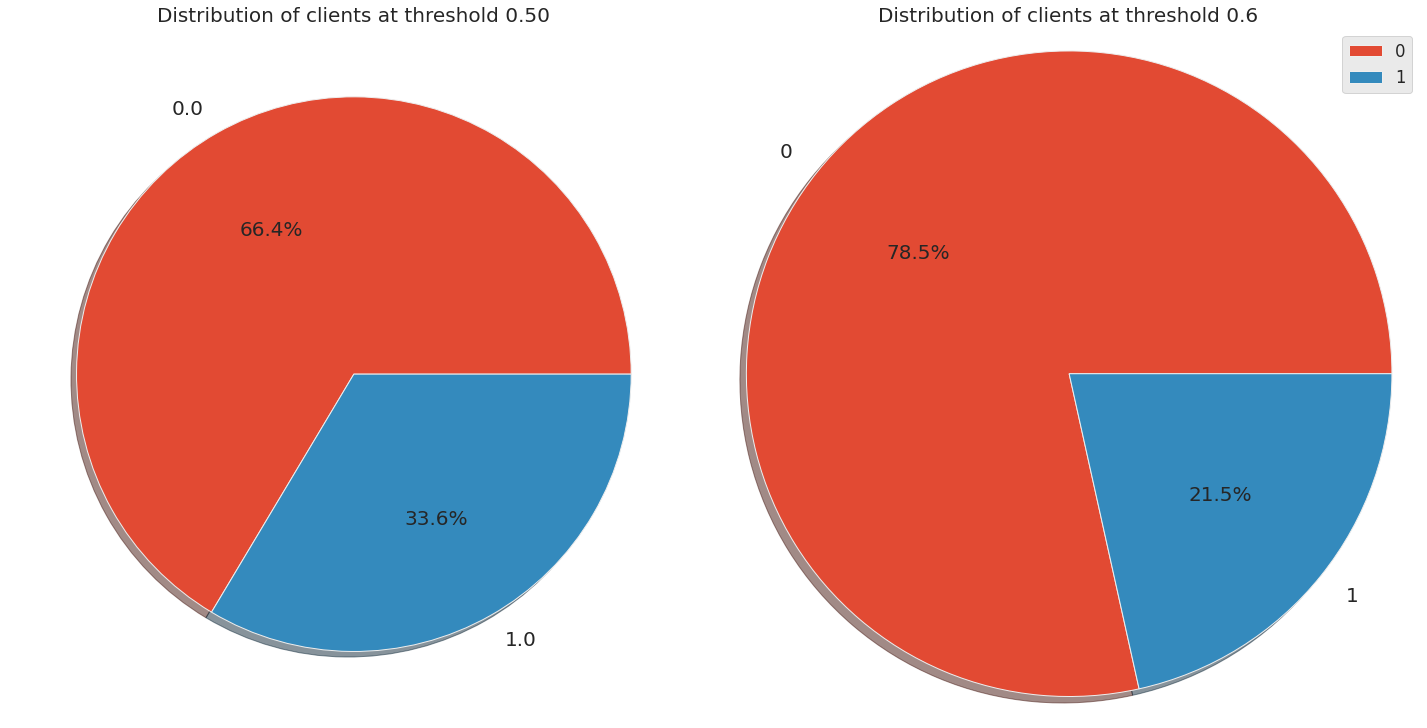

time: 349 ms (started: 2021-08-09 13:32:13 +00:00)


In [ ]:
test_train_col_category(predictive_class_50, predictive_class_54, 'probability_default_payment', (20,20), seuil)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(colored('L\'accuracy score est de {} .\n \n '.format(
        accuracy), 'blue'))

precision = precision_score(y_test, prediction, average='binary')
print(colored('Le score de précision est de {}.\n \n '.format(
        precision), 'blue'))

recall = recall_score(y_test, prediction, average='binary')
print(colored('Le score recall est de {}.\n \n '.format(
        recall), 'blue'))

AUC = roc_auc_score(y_test, probability_default_payment)       
print(colored('Le score AUC est de {}.\n \n '.format(
        AUC), 'blue'))

f1 = f1_score(y_test, prediction, average='binary')
print(colored('Le score f1 est de {}.\n \n '.format(
        f1), 'blue'))

L'accuracy score est de 0.7913571474710936 .
 
 
Le score de précision est de 0.1751200480192077.
 
 
Le score recall est de 0.547887323943662.
 
 
Le score AUC est de 0.7544529617587137.
 
 
Le score f1 est de 0.2654082328860587.
 
 
time: 139 ms (started: 2021-08-09 13:32:13 +00:00)


In [ ]:
df_matrice_confusion = matrix_TN_FN(y_test, prediction)
df_matrice_confusion

,Predicted Negative (0),Predicted Positive (1)
Real Negative (0),23335 (TN),5497 (FP)
Real Positive (1),963 (FN),1167 (TP)


time: 28 ms (started: 2021-08-09 13:32:13 +00:00)


In [ ]:
roc_auc = roc_auc_score(y_test, probability_default_payment) 
print('AUC : %0.4f' %roc_auc)
print(classification_report(y_test, prediction))

AUC : 0.7545
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88     28832
         1.0       0.18      0.55      0.27      2130

    accuracy                           0.79     30962
   macro avg       0.57      0.68      0.57     30962
weighted avg       0.91      0.79      0.84     30962

time: 94.7 ms (started: 2021-08-09 13:32:13 +00:00)


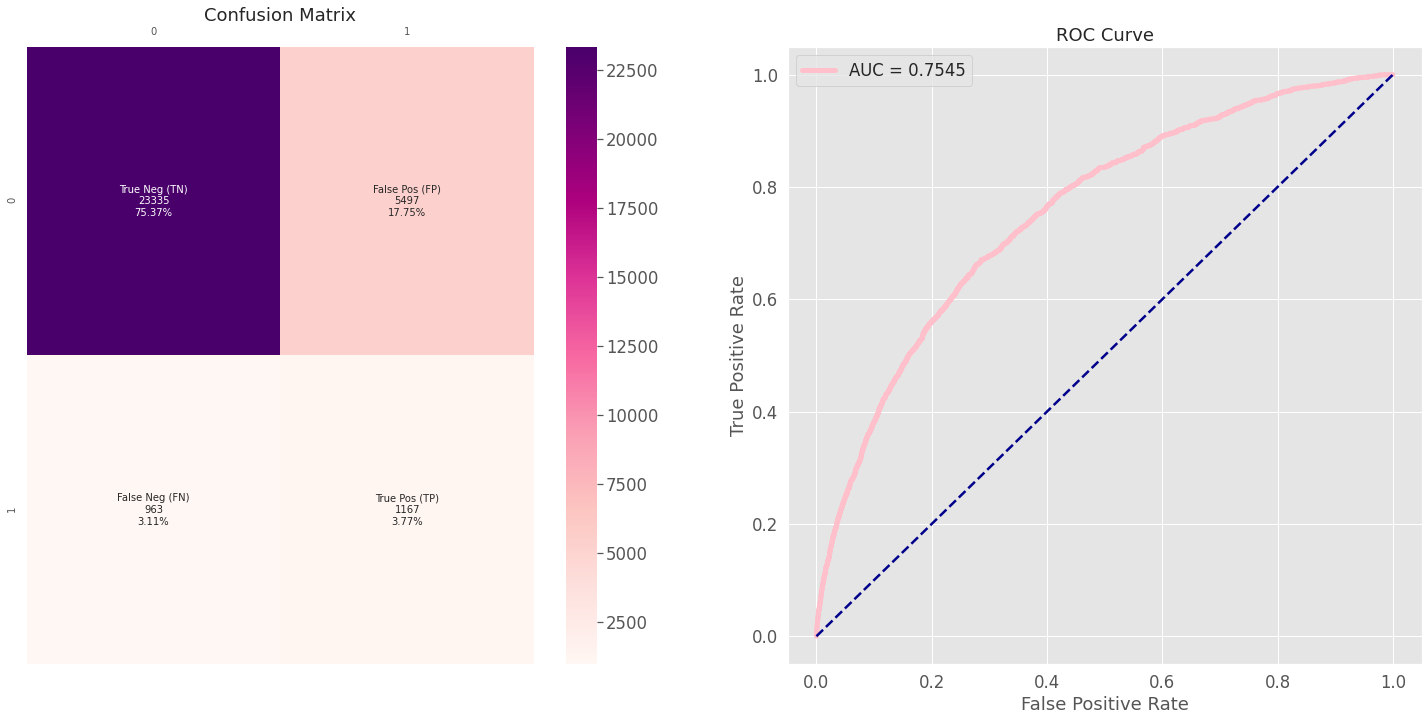

True negative =  23335
False positive =  5497
False negative =  963
True positive =  1167
time: 915 ms (started: 2021-08-09 13:32:13 +00:00)


In [ ]:
tn, fp, fn, tp = cf_matrix_roc_auc(y_test, prediction, probability, (25,25))

In [ ]:
score_gain = score_banq(tn, fp, fn, tp, 10, -1, -100, 0)
score_gain

0.70429801264543

time: 4.97 ms (started: 2021-08-09 13:32:14 +00:00)


In [ ]:
comparison_thresh = comparison_thresh.append(
    pd.DataFrame(
        {
         "Modele": "Après détermination du seuil optimal (0,50)",
         "Accuracy": accuracy,
         "AUC": AUC,
         "Recall class 1":recall,
         "F1":f1,   
         "TP":tp,
         "Precision":precision,
         "FN":fn,
         "score Gain":score_gain
        },
        index=[1],
    )
)
comparison_thresh

,Modele,Accuracy,AUC,Recall class 1,F1,TP,Precision,FN,score Gain
0,"Avant de déterminer le seuil optimal (0,50)",0.689426,0.754453,0.683099,0.232317,1455,0.139958,675,0.687163
1,"Après détermination du seuil optimal (0,50)",0.791357,0.754453,0.547887,0.265408,1167,0.175120,963,0.704298


time: 25 ms (started: 2021-08-09 13:32:14 +00:00)


In [ ]:
comparison_percentage = pd.concat([X_test, y_test], axis=1)
comparison_percentage['PREDICTION'] = prediction

time: 27.7 ms (started: 2021-08-09 13:32:14 +00:00)


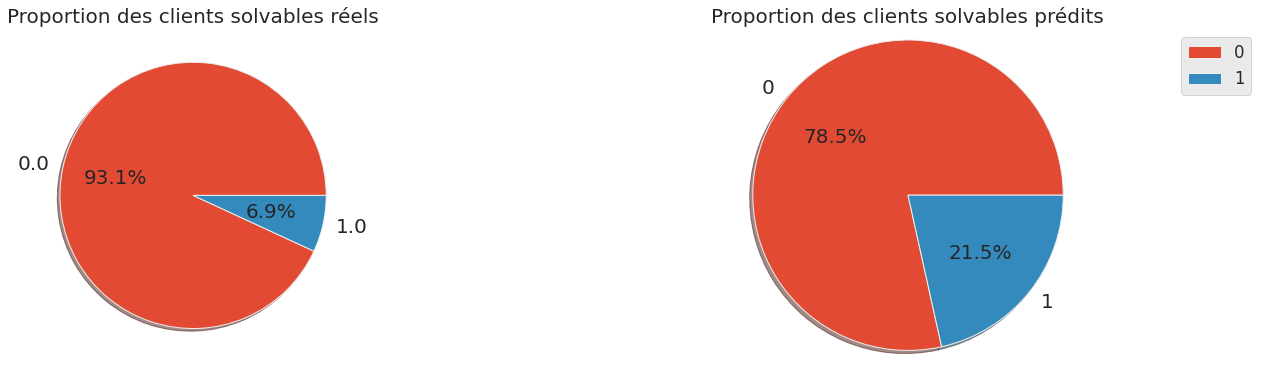

time: 277 ms (started: 2021-08-09 13:32:14 +00:00)


In [ ]:
values_train = comparison_percentage["TARGET"].value_counts()
labels_train = comparison_percentage["TARGET"].value_counts().index
values_test = comparison_percentage["PREDICTION"].value_counts()
labels_test = comparison_percentage["PREDICTION"].value_counts().index
    
plt.figure(figsize=(20,10))
    
#pie plot
plt.subplot(2, 2, 1)
plt.title("Proportion des clients solvables réels", fontsize=20)
plt.pie(values_train, labels=labels_train,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
    
    
# Pie Plot
plt.subplot(2, 2, 2)
plt.title("Proportion des clients solvables prédits", fontsize=20)
plt.pie(values_test, labels=labels_test,
            autopct='%.1f%%', shadow=True, textprops={'fontsize': 20})
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

il y a plus de personnes catégorisées comme personnes ne pouvant pas payer leur prêt comparé à la réalité. Le fait qu'il y ait plus de personnes prédites comme des non payeur n'est pas grave car la banque ne perd pas d'argent.

## <font color='blue'>Importance des features </font>

### <font color='grey'>Features importance simple</font>

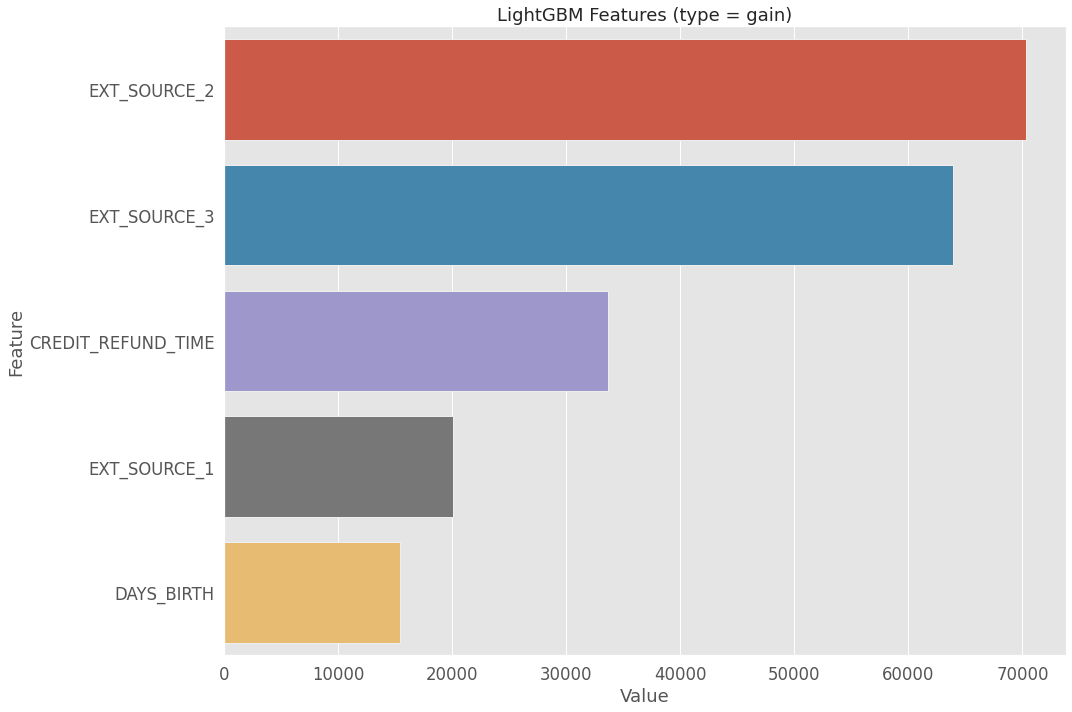

time: 490 ms (started: 2021-08-09 13:32:14 +00:00)


In [ ]:
feature_imp = pd.DataFrame(sorted(zip(best_model.booster_.feature_importance(importance_type='gain'),X_train_undersampled.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(5))
plt.title('LightGBM Features (type = gain)')
plt.tight_layout()
plt.show()

Avec cette représentation, on peut dire que les features les plus importantes pour la prédiction d'accord d'un prêt sont les sources extérieures 2 et 3 qui sont les scores normalisés créés à partir d'une source de données externe. Ces scores pourraient regrouper différentes caractéristiques sur le paiement d'un crédit tel que le retard de paiement par exemple. Plus ces scores sont élevés et plus le client risque de ne pas voir sa demande de prêt accepté.
Puis on trouve la durée que met un client à rembourser un prêt. Plus le temps de remboursement des crédits est grand plus il y a de chance que le prêt ne lui soit pas accordé. Puis il y a la source externe 1. 
Le nombre de jours depuis la naissance des clients donc leur âge joue un rôle important dans l'acceptation d'un crédit. Comme nous l'avons vu lors du préprocessing, les clients jeunes ont plus de mal à rembourser leur prêt. 

### <font color='grey'>Features importance SHAP</font>

Les valeurs de Shapley calculent l’importance d’une variable en comparant la sortie qu’un modèle peut prédire avec et sans cette variable. Cependant, étant donné que l’ordre dans lequel un modèle voit les variables peut affecter ses prédictions, cela se fait dans tous les ordres possibles, afin que les fonctionnalités soient comparées équitablement. Cette approche est inspirée de la théorie des jeux.

SHAP s’utilise pour expliquer un modèle existant. Prenant un cas de classification binaire construite avec un modèle sklearn. On entraine, tune et teste notre modèle. Ensuite on peut utiliser nos données et le modèle pour créer un modèle supplémentaire de SHAP qui explique notre modèle de classification.

Les valeurs Shap sont des tableaux d'une longueur correspondant au nombre de classes dans la cible. Ici, le problème est la classification binaire, et donc les valeurs Shap ont deux tableaux correspondant à l'une ou l'autre classe.

Les valeurs Shap sont des nombres à virgule flottante correspondant aux données de chaque ligne correspondant à chaque caractéristique. La valeur Shap représente la contribution de ce point de données particulier dans la prédiction des sorties. Si la valeur shap est très proche de zéro, on peut dire que le point de données contribue très peu aux prédictions. Si la valeur shap est une valeur fortement positive ou fortement négative, nous pouvons dire que le point de données contribue grandement à la prédiction de la classe positive ou négative.



In [ ]:
# explain 10000 examples from the test set
# each row is an explanation for a sample, and the last column in the base rate of the model
shap_values = shap.TreeExplainer(best_model.booster_).shap_values(X_test.iloc[:10000,:])

time: 1min 12s (started: 2021-08-09 13:37:02 +00:00)


In [ ]:
# compute the global importance of each feature as the mean absolute value
# of the feature's importance over all the samples
global_importances = np.abs(shap_values).mean(0)[:-1]

array([[0.0271806 , 0.11584499, 0.05441797, ..., 0.00519249, 0.00102817,
        0.        ],
       [0.03024542, 0.15742419, 0.04656323, ..., 0.00556574, 0.00234792,
        0.        ],
       [0.02840989, 0.15169682, 0.03471258, ..., 0.00518241, 0.00126291,
        0.        ],
       ...,
       [0.0257691 , 0.21301919, 0.07661485, ..., 0.0028986 , 0.00048676,
        0.        ],
       [0.01654115, 0.2307882 , 0.0353186 , ..., 0.00353841, 0.00198591,
        0.        ],
       [0.0260573 , 0.1178714 , 0.15879656, ..., 0.00384851, 0.00324363,
        0.        ]])

time: 31.8 ms (started: 2021-08-09 14:35:14 +00:00)


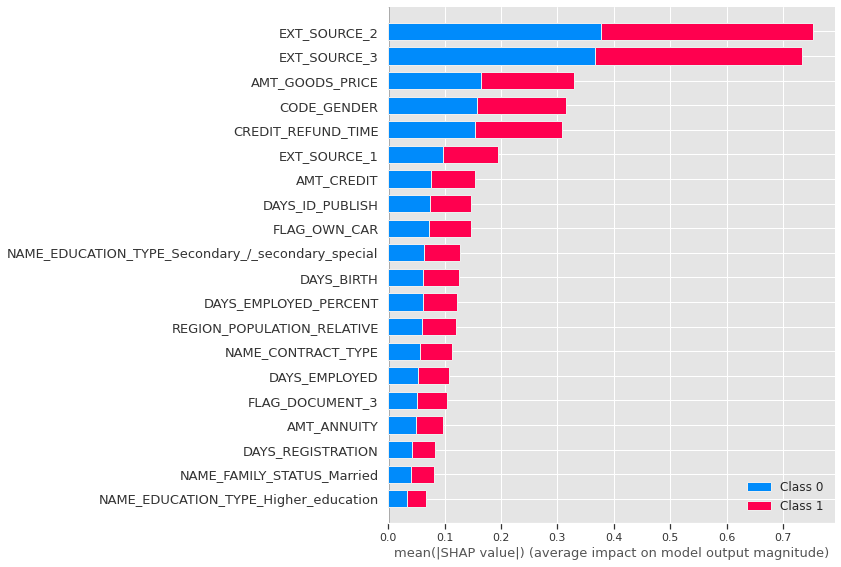

time: 414 ms (started: 2021-08-09 14:35:34 +00:00)


In [ ]:
shap.summary_plot(shap_values, X_test.iloc[:10000,:])

Avec ce graphique, nous pouvons voir que nous retrouvons les EXT_SOURCES 1, 2 et 3 ainsi que CREDIT_REFUND_TIME. Un peu plus bas nous retrouvons DAYS_BIRTHS même si il semble jouer un rôle moins important pour le fait qu'une personne soit non solvable. Dans cette nouvelle représentation, le Genre du client est important dans la prédiction mais nous ne le prendrons pas en compte car cette information ferait de notre modèle un modèle discriminant. Nous trouvons également un rôle important pour la variable AMT_GOODS_PRICE qui correspond au montant du prix des biens pour lesquels le prêt est accordé pour les prêts de consommation qui ne sera pas pris en compte car le choix peut être biaisé et le crédit ne pourrait pas être accordé si le biens est trop cher.

Nous prendrons donc en comte les features EXT_SOURCES 1, 2, 3 ainsi que CREDIT_REFUND_TIME et l'âge.

Voyons plus en détail l'influence de chacune de ces variables sur la prédiction de non solvabilité.

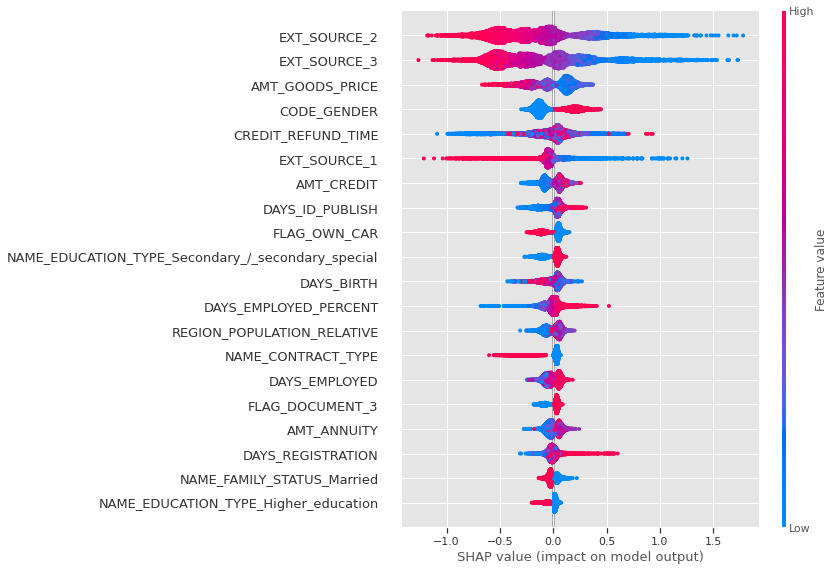

time: 1.97 s (started: 2021-08-09 13:38:14 +00:00)


In [ ]:
shap.summary_plot(shap_values[1], X_test.astype("float").iloc[:10000,:])
#shap.summary_plot(shap_values[1], X_test.astype("float"))

Nous traçons les valeurs SHAP de chaque caractéristique pour chaque échantillon sur l'axe des x, puis nous les laissons s'accumuler. Si nous colorons ensuite chaque point selon sa valeur, nous pouvons voir comment une valeur faible ou élevée affecte la sortie du modèle. 

Pour EXT_SOURCE_2, EXT_SOURCE_3, EXT_SOURCE_1 on peut voir que de faibles valeurs augmentent de manière significative la sortie de probabilité du modèle et donc le fait d'être non solvable.

Au contraire, pour CREDIT_REFUND_TIME, plus le temps de remboursement des crédits est grand plus il a de chance que le prêt ne lui soit pas accordé.